In [1]:
!pip install torch-geometric

# !unzip "/content/Archive.zip"
# !rm -rf '/content/prepared_samples'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.4 MB/s eta 0:00:00


In [2]:
#create samples :
import os
import torch
import pickle
import pandas as pd

def load_graph(path, is_pickle=True):
    """
    Load a molecule graph (.pkl) or a protein graph (.pt).
    If is_pickle is True, use pickle to load the file; otherwise, use torch.load.
    """
    if is_pickle:
        with open(path, 'rb') as f:
            return pickle.load(f)
    else:
        return torch.load(path)

def prepare_dataset_individual_save_as_pt(filtered_dataset, molecule_graph_dir, protein_graph_dir, output_dir):
    """
    Incrementally prepares the dataset and saves each (molecule, protein, target) tuple as a separate .pt file.

    Args:
    - filtered_dataset: The filtered KIBA dataset (DataFrame).
    - molecule_graph_dir: Directory where molecule graphs are stored.
    - protein_graph_dir: Directory where protein graphs are stored.
    - output_dir: Directory to save the prepared dataset incrementally.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for index, row in filtered_dataset.iterrows():
        protein_id = row['Target_ID']
        chembl_id = row['Drug_ID']

        # Load the protein graph (.pt)
        pro_graph_path = os.path.join(protein_graph_dir, f"{protein_id}_graph.pt")
        if not os.path.exists(pro_graph_path):
            print(f"Protein graph not found: {protein_id}")
            continue
        pro_graph = load_graph(pro_graph_path, is_pickle=False)

        # Load the molecule graph (.pkl)
        mol_graph_path = os.path.join(molecule_graph_dir, f"{chembl_id}_graph.pkl")
        if not os.path.exists(mol_graph_path):
            print(f"Molecule graph not found: {chembl_id}")
            continue
        mol_graph = load_graph(mol_graph_path)

        # Load target (affinity value)
        target = torch.tensor([row['Y']], dtype=torch.float)

        # Create the sample as a tuple (molecule graph, protein graph, target)
        sample = (mol_graph, pro_graph, target)

        # Save the sample as a .pt file
        sample_path = os.path.join(output_dir, f"sample_{index}.pt")
        torch.save(sample, sample_path)

        if(index%4000 == 0 ):
            print(f"Saved sample {index} as {sample_path}")




# Example usage for individual saving
molecule_graph_dir = '/kaggle/input/graphs/molecule_graphs'  # Directory where molecule graphs are stored
protein_graph_dir = '/kaggle/input/graphs/ProteinGraphs'  # Directory where protein graphs are stored
filtered_dataset_path = '/kaggle/input/graphs/filtered_DavisDataSet.csv'  # Path to the filtered dataset CSV
output_dir = 'prepared_samples/'  # Directory to save individual samples

# Load filtered dataset CSV
filtered_dataset = pd.read_csv(filtered_dataset_path)

# Prepare the dataset incrementally, saving each sample as a .pt file
prepare_dataset_individual_save_as_pt(filtered_dataset, molecule_graph_dir, protein_graph_dir, output_dir)

print("Dataset preparation completed.")


<ipython-input-2-978404414efb>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(path)


Saved sample 0 as prepared_samples/sample_0.pt


<ipython-input-2-978404414efb>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(path)


Saved sample 4000 as prepared_samples/sample_4000.pt
Saved sample 8000 as prepared_samples/sample_8000.pt
Saved sample 12000 as prepared_samples/sample_12000.pt
Saved sample 16000 as prepared_samples/sample_16000.pt
Dataset preparation completed.


Running on cuda.
Checkpoints will be saved to: /kaggle/working/TrainingModelADD
Starting fresh metrics tracking.
GNNNet Loaded
No existing checkpoint found; starting fresh.


Training:   0%|          | 0/250 [00:30<?, ?epoch/s]

[Epoch 1/250] Training Loss: 3.0047


Training:   0%|          | 1/250 [01:03<4:25:21, 63.94s/epoch]

  Train => MSE=0.7983, CI=0.4865, Pearson=0.0247
  Test  => MSE=0.8042, CI=0.5014, Pearson=0.0441
Checkpoint saved at epoch 1


Training:   0%|          | 1/250 [01:32<4:25:21, 63.94s/epoch]

[Epoch 2/250] Training Loss: 0.8301


Training:   1%|          | 2/250 [02:03<4:14:39, 61.61s/epoch]

  Train => MSE=0.8599, CI=0.6732, Pearson=0.3183
  Test  => MSE=0.8840, CI=0.6536, Pearson=0.2839
Checkpoint saved at epoch 2
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch1.pt


Training:   1%|          | 2/250 [02:32<4:14:39, 61.61s/epoch]

[Epoch 3/250] Training Loss: 0.7709


Training:   1%|          | 3/250 [03:03<4:09:40, 60.65s/epoch]

  Train => MSE=0.7087, CI=0.6938, Pearson=0.3721
  Test  => MSE=0.7329, CI=0.6728, Pearson=0.3399
Checkpoint saved at epoch 3
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch2.pt


Training:   1%|          | 3/250 [03:31<4:09:40, 60.65s/epoch]

[Epoch 4/250] Training Loss: 0.7269


Training:   2%|▏         | 4/250 [04:02<4:06:09, 60.04s/epoch]

  Train => MSE=0.9202, CI=0.7212, Pearson=0.4240
  Test  => MSE=0.9522, CI=0.7021, Pearson=0.3916
Checkpoint saved at epoch 4
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch3.pt


Training:   2%|▏         | 4/250 [04:31<4:06:09, 60.04s/epoch]

[Epoch 5/250] Training Loss: 0.7119


Training:   2%|▏         | 5/250 [05:01<4:04:03, 59.77s/epoch]

  Train => MSE=0.9745, CI=0.7385, Pearson=0.4627
  Test  => MSE=1.0078, CI=0.7222, Pearson=0.4292
Checkpoint saved at epoch 5
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch4.pt


Training:   2%|▏         | 5/250 [05:30<4:04:03, 59.77s/epoch]

[Epoch 6/250] Training Loss: 0.6980


Training:   2%|▏         | 6/250 [06:01<4:02:26, 59.62s/epoch]

  Train => MSE=0.9139, CI=0.7474, Pearson=0.4838
  Test  => MSE=0.9473, CI=0.7326, Pearson=0.4501
Checkpoint saved at epoch 6
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch5.pt


Training:   2%|▏         | 6/250 [06:29<4:02:26, 59.62s/epoch]

[Epoch 7/250] Training Loss: 0.6899


Training:   3%|▎         | 7/250 [07:00<4:00:46, 59.45s/epoch]

  Train => MSE=0.9033, CI=0.7526, Pearson=0.5011
  Test  => MSE=0.9384, CI=0.7396, Pearson=0.4641
Checkpoint saved at epoch 7
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch6.pt


Training:   3%|▎         | 7/250 [07:28<4:00:46, 59.45s/epoch]

[Epoch 8/250] Training Loss: 0.6616


Training:   3%|▎         | 8/250 [07:59<4:00:00, 59.51s/epoch]

  Train => MSE=0.7411, CI=0.7572, Pearson=0.5090
  Test  => MSE=0.7746, CI=0.7442, Pearson=0.4736
Checkpoint saved at epoch 8
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch7.pt


Training:   3%|▎         | 8/250 [08:28<4:00:00, 59.51s/epoch]

[Epoch 9/250] Training Loss: 0.6464


Training:   4%|▎         | 9/250 [08:59<3:58:41, 59.42s/epoch]

  Train => MSE=0.7273, CI=0.7628, Pearson=0.5195
  Test  => MSE=0.7609, CI=0.7504, Pearson=0.4839
Checkpoint saved at epoch 9
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch8.pt


Training:   4%|▎         | 9/250 [09:27<3:58:41, 59.42s/epoch]

[Epoch 10/250] Training Loss: 0.6444


Training:   4%|▍         | 10/250 [09:58<3:57:53, 59.47s/epoch]

  Train => MSE=0.9492, CI=0.7629, Pearson=0.5218
  Test  => MSE=0.9847, CI=0.7491, Pearson=0.4836
Checkpoint saved at epoch 10
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch9.pt


Training:   4%|▍         | 10/250 [10:27<3:57:53, 59.47s/epoch]

[Epoch 11/250] Training Loss: 0.6458


Training:   4%|▍         | 11/250 [10:58<3:56:57, 59.49s/epoch]

  Train => MSE=0.7288, CI=0.7674, Pearson=0.5277
  Test  => MSE=0.7633, CI=0.7531, Pearson=0.4914
Checkpoint saved at epoch 11
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch10.pt


Training:   4%|▍         | 11/250 [11:26<3:56:57, 59.49s/epoch]

[Epoch 12/250] Training Loss: 0.6328


Training:   5%|▍         | 12/250 [11:57<3:55:49, 59.45s/epoch]

  Train => MSE=0.5726, CI=0.7707, Pearson=0.5343
  Test  => MSE=0.6065, CI=0.7557, Pearson=0.4954
Checkpoint saved at epoch 12
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch11.pt


Training:   5%|▍         | 12/250 [12:26<3:55:49, 59.45s/epoch]

[Epoch 13/250] Training Loss: 0.6174


Training:   5%|▌         | 13/250 [12:56<3:54:44, 59.43s/epoch]

  Train => MSE=0.5397, CI=0.7748, Pearson=0.5392
  Test  => MSE=0.5742, CI=0.7592, Pearson=0.5007
Checkpoint saved at epoch 13
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch12.pt


Training:   5%|▌         | 13/250 [13:25<3:54:44, 59.43s/epoch]

[Epoch 14/250] Training Loss: 0.6077


Training:   6%|▌         | 14/250 [13:56<3:53:29, 59.36s/epoch]

  Train => MSE=0.5292, CI=0.7773, Pearson=0.5481
  Test  => MSE=0.5650, CI=0.7613, Pearson=0.5086
Checkpoint saved at epoch 14
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch13.pt


Training:   6%|▌         | 14/250 [14:24<3:53:29, 59.36s/epoch]

[Epoch 15/250] Training Loss: 0.5995


Training:   6%|▌         | 15/250 [14:55<3:52:01, 59.24s/epoch]

  Train => MSE=0.5216, CI=0.7789, Pearson=0.5542
  Test  => MSE=0.5592, CI=0.7628, Pearson=0.5118
Checkpoint saved at epoch 15
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch14.pt


Training:   6%|▌         | 15/250 [15:23<3:52:01, 59.24s/epoch]

[Epoch 16/250] Training Loss: 0.5903


Training:   6%|▋         | 16/250 [15:54<3:50:58, 59.23s/epoch]

  Train => MSE=0.5306, CI=0.7813, Pearson=0.5646
  Test  => MSE=0.5706, CI=0.7651, Pearson=0.5187
Checkpoint saved at epoch 16
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch15.pt


Training:   6%|▋         | 16/250 [16:22<3:50:58, 59.23s/epoch]

[Epoch 17/250] Training Loss: 0.5788


Training:   7%|▋         | 17/250 [16:53<3:50:04, 59.25s/epoch]

  Train => MSE=0.5041, CI=0.7848, Pearson=0.5726
  Test  => MSE=0.5461, CI=0.7674, Pearson=0.5254
Checkpoint saved at epoch 17
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch16.pt


Training:   7%|▋         | 17/250 [17:22<3:50:04, 59.25s/epoch]

[Epoch 18/250] Training Loss: 0.5785


Training:   7%|▋         | 18/250 [17:53<3:49:20, 59.31s/epoch]

  Train => MSE=0.5199, CI=0.7838, Pearson=0.5657
  Test  => MSE=0.5607, CI=0.7654, Pearson=0.5198
Checkpoint saved at epoch 18
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch17.pt


Training:   7%|▋         | 18/250 [18:21<3:49:20, 59.31s/epoch]

[Epoch 19/250] Training Loss: 0.5729


Training:   8%|▊         | 19/250 [18:52<3:48:12, 59.27s/epoch]

  Train => MSE=0.5328, CI=0.7885, Pearson=0.5820
  Test  => MSE=0.5769, CI=0.7706, Pearson=0.5332
Checkpoint saved at epoch 19
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch18.pt


Training:   8%|▊         | 19/250 [19:20<3:48:12, 59.27s/epoch]

[Epoch 20/250] Training Loss: 0.5590


Training:   8%|▊         | 20/250 [19:51<3:47:16, 59.29s/epoch]

  Train => MSE=0.4904, CI=0.7896, Pearson=0.5848
  Test  => MSE=0.5354, CI=0.7723, Pearson=0.5376
Checkpoint saved at epoch 20
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch19.pt


Training:   8%|▊         | 20/250 [20:19<3:47:16, 59.29s/epoch]

[Epoch 21/250] Training Loss: 0.5623


Training:   8%|▊         | 21/250 [20:50<3:46:01, 59.22s/epoch]

  Train => MSE=0.4814, CI=0.7916, Pearson=0.5952
  Test  => MSE=0.5280, CI=0.7745, Pearson=0.5466
Checkpoint saved at epoch 21
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch20.pt


Training:   8%|▊         | 21/250 [21:19<3:46:01, 59.22s/epoch]

[Epoch 22/250] Training Loss: 0.5606


Training:   9%|▉         | 22/250 [21:49<3:44:56, 59.19s/epoch]

  Train => MSE=0.5468, CI=0.7896, Pearson=0.5845
  Test  => MSE=0.5897, CI=0.7710, Pearson=0.5351
Checkpoint saved at epoch 22
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch21.pt


Training:   9%|▉         | 22/250 [22:18<3:44:56, 59.19s/epoch]

[Epoch 23/250] Training Loss: 0.5561


Training:   9%|▉         | 23/250 [22:48<3:43:53, 59.18s/epoch]

  Train => MSE=0.5064, CI=0.7937, Pearson=0.6000
  Test  => MSE=0.5523, CI=0.7756, Pearson=0.5500
Checkpoint saved at epoch 23
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch22.pt


Training:   9%|▉         | 23/250 [23:17<3:43:53, 59.18s/epoch]

[Epoch 24/250] Training Loss: 0.5495


Training:  10%|▉         | 24/250 [23:48<3:42:57, 59.19s/epoch]

  Train => MSE=0.5398, CI=0.7868, Pearson=0.5983
  Test  => MSE=0.5873, CI=0.7658, Pearson=0.5453
Checkpoint saved at epoch 24
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch23.pt


Training:  10%|▉         | 24/250 [24:16<3:42:57, 59.19s/epoch]

[Epoch 25/250] Training Loss: 0.5427


Training:  10%|█         | 25/250 [24:47<3:42:01, 59.21s/epoch]

  Train => MSE=0.5764, CI=0.7911, Pearson=0.5993
  Test  => MSE=0.6260, CI=0.7697, Pearson=0.5441
Checkpoint saved at epoch 25
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch24.pt


Training:  10%|█         | 25/250 [25:15<3:42:01, 59.21s/epoch]

[Epoch 26/250] Training Loss: 0.5412


Training:  10%|█         | 26/250 [25:46<3:41:07, 59.23s/epoch]

  Train => MSE=0.5278, CI=0.7902, Pearson=0.6025
  Test  => MSE=0.5769, CI=0.7686, Pearson=0.5468
Checkpoint saved at epoch 26
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch25.pt


Training:  10%|█         | 26/250 [26:15<3:41:07, 59.23s/epoch]

[Epoch 27/250] Training Loss: 0.5395


Training:  11%|█         | 27/250 [26:45<3:40:07, 59.23s/epoch]

  Train => MSE=0.5363, CI=0.7913, Pearson=0.6077
  Test  => MSE=0.5859, CI=0.7702, Pearson=0.5541
Checkpoint saved at epoch 27
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch26.pt


Training:  11%|█         | 27/250 [27:14<3:40:07, 59.23s/epoch]

[Epoch 28/250] Training Loss: 0.5278


Training:  11%|█         | 28/250 [27:45<3:39:06, 59.22s/epoch]

  Train => MSE=0.4998, CI=0.8039, Pearson=0.6215
  Test  => MSE=0.5530, CI=0.7841, Pearson=0.5688
Checkpoint saved at epoch 28
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch27.pt


Training:  11%|█         | 28/250 [28:13<3:39:06, 59.22s/epoch]

[Epoch 29/250] Training Loss: 0.5307


Training:  12%|█▏        | 29/250 [28:44<3:37:58, 59.18s/epoch]

  Train => MSE=0.4933, CI=0.7972, Pearson=0.6224
  Test  => MSE=0.5463, CI=0.7747, Pearson=0.5653
Checkpoint saved at epoch 29
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch28.pt


Training:  12%|█▏        | 29/250 [29:12<3:37:58, 59.18s/epoch]

[Epoch 30/250] Training Loss: 0.5296


Training:  12%|█▏        | 30/250 [29:43<3:36:56, 59.17s/epoch]

  Train => MSE=0.5161, CI=0.7933, Pearson=0.6277
  Test  => MSE=0.5697, CI=0.7703, Pearson=0.5709
Checkpoint saved at epoch 30
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch29.pt


Training:  12%|█▏        | 30/250 [30:11<3:36:56, 59.17s/epoch]

[Epoch 31/250] Training Loss: 0.5221


Training:  12%|█▏        | 31/250 [30:42<3:35:52, 59.14s/epoch]

  Train => MSE=0.4883, CI=0.8034, Pearson=0.6324
  Test  => MSE=0.5437, CI=0.7803, Pearson=0.5762
Checkpoint saved at epoch 31
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch30.pt


Training:  12%|█▏        | 31/250 [31:10<3:35:52, 59.14s/epoch]

[Epoch 32/250] Training Loss: 0.5120


Training:  13%|█▎        | 32/250 [31:41<3:34:59, 59.17s/epoch]

  Train => MSE=0.4471, CI=0.8129, Pearson=0.6420
  Test  => MSE=0.5020, CI=0.7916, Pearson=0.5885
Checkpoint saved at epoch 32
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch31.pt


Training:  13%|█▎        | 32/250 [32:10<3:34:59, 59.17s/epoch]

[Epoch 33/250] Training Loss: 0.5156


Training:  13%|█▎        | 33/250 [32:40<3:33:59, 59.17s/epoch]

  Train => MSE=0.4615, CI=0.8073, Pearson=0.6327
  Test  => MSE=0.5154, CI=0.7865, Pearson=0.5783
Checkpoint saved at epoch 33
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch32.pt


Training:  13%|█▎        | 33/250 [33:09<3:33:59, 59.17s/epoch]

[Epoch 34/250] Training Loss: 0.5151


Training:  14%|█▎        | 34/250 [33:39<3:32:59, 59.16s/epoch]

  Train => MSE=0.4590, CI=0.8085, Pearson=0.6357
  Test  => MSE=0.5141, CI=0.7851, Pearson=0.5782
Checkpoint saved at epoch 34
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch33.pt


Training:  14%|█▎        | 34/250 [34:08<3:32:59, 59.16s/epoch]

[Epoch 35/250] Training Loss: 0.5158


Training:  14%|█▍        | 35/250 [34:39<3:32:11, 59.22s/epoch]

  Train => MSE=0.4492, CI=0.8141, Pearson=0.6422
  Test  => MSE=0.5026, CI=0.7937, Pearson=0.5903
Checkpoint saved at epoch 35
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch34.pt


Training:  14%|█▍        | 35/250 [35:07<3:32:11, 59.22s/epoch]

[Epoch 36/250] Training Loss: 0.5032


Training:  14%|█▍        | 36/250 [35:38<3:31:25, 59.28s/epoch]

  Train => MSE=0.4838, CI=0.8119, Pearson=0.6350
  Test  => MSE=0.5406, CI=0.7897, Pearson=0.5779
Checkpoint saved at epoch 36
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch35.pt


Training:  14%|█▍        | 36/250 [36:08<3:31:25, 59.28s/epoch]

[Epoch 37/250] Training Loss: 0.5134


Training:  15%|█▍        | 37/250 [36:38<3:31:23, 59.55s/epoch]

  Train => MSE=0.4773, CI=0.8108, Pearson=0.6439
  Test  => MSE=0.5340, CI=0.7890, Pearson=0.5884
Checkpoint saved at epoch 37
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch36.pt


Training:  15%|█▍        | 37/250 [37:07<3:31:23, 59.55s/epoch]

[Epoch 38/250] Training Loss: 0.5042


Training:  15%|█▌        | 38/250 [37:37<3:29:44, 59.36s/epoch]

  Train => MSE=0.4994, CI=0.8084, Pearson=0.6366
  Test  => MSE=0.5588, CI=0.7867, Pearson=0.5789
Checkpoint saved at epoch 38
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch37.pt


Training:  15%|█▌        | 38/250 [38:05<3:29:44, 59.36s/epoch]

[Epoch 39/250] Training Loss: 0.5020


Training:  16%|█▌        | 39/250 [38:36<3:28:11, 59.20s/epoch]

  Train => MSE=0.4821, CI=0.8113, Pearson=0.6391
  Test  => MSE=0.5397, CI=0.7899, Pearson=0.5826
Checkpoint saved at epoch 39
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch38.pt


Training:  16%|█▌        | 39/250 [39:05<3:28:11, 59.20s/epoch]

[Epoch 40/250] Training Loss: 0.5055


Training:  16%|█▌        | 40/250 [39:35<3:26:54, 59.12s/epoch]

  Train => MSE=0.5037, CI=0.8121, Pearson=0.6428
  Test  => MSE=0.5639, CI=0.7915, Pearson=0.5845
Checkpoint saved at epoch 40
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch39.pt


Training:  16%|█▌        | 40/250 [40:03<3:26:54, 59.12s/epoch]

[Epoch 41/250] Training Loss: 0.5079


Training:  16%|█▋        | 41/250 [40:34<3:25:43, 59.06s/epoch]

  Train => MSE=0.4803, CI=0.8157, Pearson=0.6496
  Test  => MSE=0.5412, CI=0.7938, Pearson=0.5929
Checkpoint saved at epoch 41
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch40.pt


Training:  16%|█▋        | 41/250 [41:02<3:25:43, 59.06s/epoch]

[Epoch 42/250] Training Loss: 0.5050


Training:  17%|█▋        | 42/250 [41:33<3:24:23, 58.96s/epoch]

  Train => MSE=0.4739, CI=0.8162, Pearson=0.6499
  Test  => MSE=0.5329, CI=0.7955, Pearson=0.5959
Checkpoint saved at epoch 42
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch41.pt


Training:  17%|█▋        | 42/250 [42:01<3:24:23, 58.96s/epoch]

[Epoch 43/250] Training Loss: 0.4993


Training:  17%|█▋        | 43/250 [42:31<3:23:04, 58.86s/epoch]

  Train => MSE=0.4677, CI=0.8153, Pearson=0.6480
  Test  => MSE=0.5277, CI=0.7928, Pearson=0.5903
Checkpoint saved at epoch 43
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch42.pt


Training:  17%|█▋        | 43/250 [43:00<3:23:04, 58.86s/epoch]

[Epoch 44/250] Training Loss: 0.4976


Training:  18%|█▊        | 44/250 [43:31<3:22:37, 59.02s/epoch]

  Train => MSE=0.4405, CI=0.8205, Pearson=0.6533
  Test  => MSE=0.4992, CI=0.7990, Pearson=0.5999
Checkpoint saved at epoch 44
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch43.pt


Training:  18%|█▊        | 44/250 [43:59<3:22:37, 59.02s/epoch]

[Epoch 45/250] Training Loss: 0.4912


Training:  18%|█▊        | 45/250 [44:30<3:21:36, 59.01s/epoch]

  Train => MSE=0.4461, CI=0.8178, Pearson=0.6510
  Test  => MSE=0.5062, CI=0.7958, Pearson=0.5975
Checkpoint saved at epoch 45
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch44.pt


Training:  18%|█▊        | 45/250 [44:58<3:21:36, 59.01s/epoch]

[Epoch 46/250] Training Loss: 0.4918


Training:  18%|█▊        | 46/250 [45:29<3:20:35, 59.00s/epoch]

  Train => MSE=0.4418, CI=0.8190, Pearson=0.6537
  Test  => MSE=0.5021, CI=0.7968, Pearson=0.5979
Checkpoint saved at epoch 46
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch45.pt


Training:  18%|█▊        | 46/250 [45:57<3:20:35, 59.00s/epoch]

[Epoch 47/250] Training Loss: 0.4871


Training:  19%|█▉        | 47/250 [46:28<3:19:31, 58.97s/epoch]

  Train => MSE=0.4441, CI=0.8196, Pearson=0.6552
  Test  => MSE=0.5042, CI=0.7976, Pearson=0.6003
Checkpoint saved at epoch 47
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch46.pt


Training:  19%|█▉        | 47/250 [46:56<3:19:31, 58.97s/epoch]

[Epoch 48/250] Training Loss: 0.4941


Training:  19%|█▉        | 48/250 [47:27<3:18:28, 58.95s/epoch]

  Train => MSE=0.4493, CI=0.8185, Pearson=0.6525
  Test  => MSE=0.5088, CI=0.7969, Pearson=0.5993
Checkpoint saved at epoch 48
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch47.pt


Training:  19%|█▉        | 48/250 [47:55<3:18:28, 58.95s/epoch]

[Epoch 49/250] Training Loss: 0.5022


Training:  20%|█▉        | 49/250 [48:25<3:17:24, 58.93s/epoch]

  Train => MSE=0.4345, CI=0.8185, Pearson=0.6573
  Test  => MSE=0.4932, CI=0.7982, Pearson=0.6043
Checkpoint saved at epoch 49
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch48.pt


Training:  20%|█▉        | 49/250 [48:54<3:17:24, 58.93s/epoch]

[Epoch 50/250] Training Loss: 0.4872


Training:  20%|██        | 50/250 [49:25<3:16:41, 59.01s/epoch]

  Train => MSE=0.4608, CI=0.8187, Pearson=0.6559
  Test  => MSE=0.5228, CI=0.7968, Pearson=0.5986
Checkpoint saved at epoch 50
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch49.pt


Training:  20%|██        | 50/250 [49:53<3:16:41, 59.01s/epoch]

[Epoch 51/250] Training Loss: 0.4953


Training:  20%|██        | 51/250 [50:24<3:16:10, 59.15s/epoch]

  Train => MSE=0.4734, CI=0.8191, Pearson=0.6570
  Test  => MSE=0.5325, CI=0.7955, Pearson=0.5997
Checkpoint saved at epoch 51
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch50.pt


Training:  20%|██        | 51/250 [50:52<3:16:10, 59.15s/epoch]

[Epoch 52/250] Training Loss: 0.4881


Training:  21%|██        | 52/250 [51:23<3:14:55, 59.07s/epoch]

  Train => MSE=0.4583, CI=0.8197, Pearson=0.6559
  Test  => MSE=0.5184, CI=0.7981, Pearson=0.6010
Checkpoint saved at epoch 52
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch51.pt


Training:  21%|██        | 52/250 [51:51<3:14:55, 59.07s/epoch]

[Epoch 53/250] Training Loss: 0.4888


Training:  21%|██        | 53/250 [52:22<3:13:48, 59.03s/epoch]

  Train => MSE=0.4407, CI=0.8215, Pearson=0.6568
  Test  => MSE=0.5011, CI=0.8010, Pearson=0.6043
Checkpoint saved at epoch 53
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch52.pt


Training:  21%|██        | 53/250 [52:50<3:13:48, 59.03s/epoch]

[Epoch 54/250] Training Loss: 0.4827


Training:  22%|██▏       | 54/250 [53:21<3:12:38, 58.97s/epoch]

  Train => MSE=0.4395, CI=0.8212, Pearson=0.6567
  Test  => MSE=0.5034, CI=0.7986, Pearson=0.5983
Checkpoint saved at epoch 54
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch53.pt


Training:  22%|██▏       | 54/250 [53:49<3:12:38, 58.97s/epoch]

[Epoch 55/250] Training Loss: 0.4887


Training:  22%|██▏       | 55/250 [54:20<3:11:34, 58.95s/epoch]

  Train => MSE=0.4282, CI=0.8228, Pearson=0.6629
  Test  => MSE=0.4888, CI=0.8006, Pearson=0.6089
Checkpoint saved at epoch 55
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch54.pt


Training:  22%|██▏       | 55/250 [54:48<3:11:34, 58.95s/epoch]

[Epoch 56/250] Training Loss: 0.4852


Training:  22%|██▏       | 56/250 [55:19<3:10:40, 58.97s/epoch]

  Train => MSE=0.4393, CI=0.8225, Pearson=0.6658
  Test  => MSE=0.4996, CI=0.8010, Pearson=0.6115
Checkpoint saved at epoch 56
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch55.pt


Training:  22%|██▏       | 56/250 [55:47<3:10:40, 58.97s/epoch]

[Epoch 57/250] Training Loss: 0.4817


Training:  23%|██▎       | 57/250 [56:17<3:09:24, 58.88s/epoch]

  Train => MSE=0.4396, CI=0.8227, Pearson=0.6608
  Test  => MSE=0.5010, CI=0.8015, Pearson=0.6045
Checkpoint saved at epoch 57
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch56.pt


Training:  23%|██▎       | 57/250 [56:46<3:09:24, 58.88s/epoch]

[Epoch 58/250] Training Loss: 0.4873


Training:  23%|██▎       | 58/250 [57:16<3:08:24, 58.88s/epoch]

  Train => MSE=0.4687, CI=0.8232, Pearson=0.6643
  Test  => MSE=0.5329, CI=0.8004, Pearson=0.6029
Checkpoint saved at epoch 58
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch57.pt


Training:  23%|██▎       | 58/250 [57:45<3:08:24, 58.88s/epoch]

[Epoch 59/250] Training Loss: 0.4855


Training:  24%|██▎       | 59/250 [58:15<3:07:22, 58.86s/epoch]

  Train => MSE=0.4279, CI=0.8235, Pearson=0.6640
  Test  => MSE=0.4923, CI=0.8013, Pearson=0.6060
Checkpoint saved at epoch 59
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch58.pt


Training:  24%|██▎       | 59/250 [58:43<3:07:22, 58.86s/epoch]

[Epoch 60/250] Training Loss: 0.4848


Training:  24%|██▍       | 60/250 [59:14<3:06:31, 58.90s/epoch]

  Train => MSE=0.4244, CI=0.8237, Pearson=0.6650
  Test  => MSE=0.4880, CI=0.8009, Pearson=0.6072
Checkpoint saved at epoch 60
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch59.pt


Training:  24%|██▍       | 60/250 [59:42<3:06:31, 58.90s/epoch]

[Epoch 61/250] Training Loss: 0.4700


Training:  24%|██▍       | 61/250 [1:00:13<3:05:28, 58.88s/epoch]

  Train => MSE=0.4186, CI=0.8256, Pearson=0.6647
  Test  => MSE=0.4786, CI=0.8029, Pearson=0.6095
Checkpoint saved at epoch 61
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch60.pt


Training:  24%|██▍       | 61/250 [1:00:41<3:05:28, 58.88s/epoch]

[Epoch 62/250] Training Loss: 0.4750


Training:  25%|██▍       | 62/250 [1:01:12<3:04:25, 58.86s/epoch]

  Train => MSE=0.4432, CI=0.8227, Pearson=0.6622
  Test  => MSE=0.5089, CI=0.7992, Pearson=0.6010
Checkpoint saved at epoch 62
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch61.pt


Training:  25%|██▍       | 62/250 [1:01:40<3:04:25, 58.86s/epoch]

[Epoch 63/250] Training Loss: 0.4906


Training:  25%|██▌       | 63/250 [1:02:10<3:03:17, 58.81s/epoch]

  Train => MSE=0.4195, CI=0.8247, Pearson=0.6666
  Test  => MSE=0.4862, CI=0.8005, Pearson=0.6049
Checkpoint saved at epoch 63
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch62.pt


Training:  25%|██▌       | 63/250 [1:02:39<3:03:17, 58.81s/epoch]

[Epoch 64/250] Training Loss: 0.4772


Training:  26%|██▌       | 64/250 [1:03:09<3:02:18, 58.81s/epoch]

  Train => MSE=0.4245, CI=0.8236, Pearson=0.6647
  Test  => MSE=0.4898, CI=0.8009, Pearson=0.6058
Checkpoint saved at epoch 64
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch63.pt


Training:  26%|██▌       | 64/250 [1:03:38<3:02:18, 58.81s/epoch]

[Epoch 65/250] Training Loss: 0.4737


Training:  26%|██▌       | 65/250 [1:04:08<3:01:31, 58.87s/epoch]

  Train => MSE=0.4428, CI=0.8256, Pearson=0.6645
  Test  => MSE=0.5094, CI=0.8007, Pearson=0.6020
Checkpoint saved at epoch 65
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch64.pt


Training:  26%|██▌       | 65/250 [1:04:36<3:01:31, 58.87s/epoch]

[Epoch 66/250] Training Loss: 0.4776


Training:  26%|██▋       | 66/250 [1:05:07<3:00:37, 58.90s/epoch]

  Train => MSE=0.4255, CI=0.8233, Pearson=0.6633
  Test  => MSE=0.4902, CI=0.7996, Pearson=0.6049
Checkpoint saved at epoch 66
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch65.pt


Training:  26%|██▋       | 66/250 [1:05:35<3:00:37, 58.90s/epoch]

[Epoch 67/250] Training Loss: 0.4830


Training:  27%|██▋       | 67/250 [1:06:06<2:59:32, 58.86s/epoch]

  Train => MSE=0.4174, CI=0.8249, Pearson=0.6702
  Test  => MSE=0.4860, CI=0.8003, Pearson=0.6078
Checkpoint saved at epoch 67
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch66.pt


Training:  27%|██▋       | 67/250 [1:06:34<2:59:32, 58.86s/epoch]

[Epoch 68/250] Training Loss: 0.4717


Training:  27%|██▋       | 68/250 [1:07:05<2:58:36, 58.88s/epoch]

  Train => MSE=0.4375, CI=0.8243, Pearson=0.6668
  Test  => MSE=0.5021, CI=0.8019, Pearson=0.6117
Checkpoint saved at epoch 68
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch67.pt


Training:  27%|██▋       | 68/250 [1:07:33<2:58:36, 58.88s/epoch]

[Epoch 69/250] Training Loss: 0.4743


Training:  28%|██▊       | 69/250 [1:08:04<2:57:33, 58.86s/epoch]

  Train => MSE=0.4273, CI=0.8236, Pearson=0.6685
  Test  => MSE=0.4969, CI=0.7997, Pearson=0.6080
Checkpoint saved at epoch 69
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch68.pt


Training:  28%|██▊       | 69/250 [1:08:32<2:57:33, 58.86s/epoch]

[Epoch 70/250] Training Loss: 0.4688


Training:  28%|██▊       | 70/250 [1:09:03<2:56:40, 58.89s/epoch]

  Train => MSE=0.4276, CI=0.8257, Pearson=0.6709
  Test  => MSE=0.4951, CI=0.8014, Pearson=0.6097
Checkpoint saved at epoch 70
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch69.pt


Training:  28%|██▊       | 70/250 [1:09:31<2:56:40, 58.89s/epoch]

[Epoch 71/250] Training Loss: 0.4742


Training:  28%|██▊       | 71/250 [1:10:02<2:55:44, 58.91s/epoch]

  Train => MSE=0.4238, CI=0.8252, Pearson=0.6709
  Test  => MSE=0.4915, CI=0.8008, Pearson=0.6114
Checkpoint saved at epoch 71
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch70.pt


Training:  28%|██▊       | 71/250 [1:10:30<2:55:44, 58.91s/epoch]

[Epoch 72/250] Training Loss: 0.4759


Training:  29%|██▉       | 72/250 [1:11:00<2:54:39, 58.87s/epoch]

  Train => MSE=0.4148, CI=0.8262, Pearson=0.6730
  Test  => MSE=0.4828, CI=0.8017, Pearson=0.6112
Checkpoint saved at epoch 72
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch71.pt


Training:  29%|██▉       | 72/250 [1:11:29<2:54:39, 58.87s/epoch]

[Epoch 73/250] Training Loss: 0.4852


Training:  29%|██▉       | 73/250 [1:11:59<2:53:35, 58.84s/epoch]

  Train => MSE=0.4333, CI=0.8259, Pearson=0.6736
  Test  => MSE=0.4986, CI=0.8007, Pearson=0.6105
Checkpoint saved at epoch 73
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch72.pt


Training:  29%|██▉       | 73/250 [1:12:27<2:53:35, 58.84s/epoch]

[Epoch 74/250] Training Loss: 0.4684


Training:  30%|██▉       | 74/250 [1:12:58<2:52:44, 58.89s/epoch]

  Train => MSE=0.4415, CI=0.8258, Pearson=0.6689
  Test  => MSE=0.5049, CI=0.8024, Pearson=0.6127
Checkpoint saved at epoch 74
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch73.pt


Training:  30%|██▉       | 74/250 [1:13:26<2:52:44, 58.89s/epoch]

[Epoch 75/250] Training Loss: 0.4659


Training:  30%|███       | 75/250 [1:13:57<2:51:45, 58.89s/epoch]

  Train => MSE=0.4300, CI=0.8257, Pearson=0.6677
  Test  => MSE=0.4949, CI=0.8015, Pearson=0.6130
Checkpoint saved at epoch 75
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch74.pt


Training:  30%|███       | 75/250 [1:14:25<2:51:45, 58.89s/epoch]

[Epoch 76/250] Training Loss: 0.4743


Training:  30%|███       | 76/250 [1:14:56<2:51:10, 59.03s/epoch]

  Train => MSE=0.4189, CI=0.8277, Pearson=0.6738
  Test  => MSE=0.4841, CI=0.8026, Pearson=0.6160
Checkpoint saved at epoch 76
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch75.pt


Training:  30%|███       | 76/250 [1:15:25<2:51:10, 59.03s/epoch]

[Epoch 77/250] Training Loss: 0.4705


Training:  31%|███       | 77/250 [1:15:55<2:50:02, 58.98s/epoch]

  Train => MSE=0.4140, CI=0.8291, Pearson=0.6752
  Test  => MSE=0.4765, CI=0.8046, Pearson=0.6199
Checkpoint saved at epoch 77
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch76.pt


Training:  31%|███       | 77/250 [1:16:23<2:50:02, 58.98s/epoch]

[Epoch 78/250] Training Loss: 0.4652


Training:  31%|███       | 78/250 [1:16:54<2:48:50, 58.90s/epoch]

  Train => MSE=0.4183, CI=0.8291, Pearson=0.6761
  Test  => MSE=0.4826, CI=0.8041, Pearson=0.6183
Checkpoint saved at epoch 78
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch77.pt


Training:  31%|███       | 78/250 [1:17:22<2:48:50, 58.90s/epoch]

[Epoch 79/250] Training Loss: 0.4717


Training:  32%|███▏      | 79/250 [1:17:53<2:47:43, 58.85s/epoch]

  Train => MSE=0.4122, CI=0.8283, Pearson=0.6732
  Test  => MSE=0.4747, CI=0.8032, Pearson=0.6171
Checkpoint saved at epoch 79
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch78.pt


Training:  32%|███▏      | 79/250 [1:18:21<2:47:43, 58.85s/epoch]

[Epoch 80/250] Training Loss: 0.4662


Training:  32%|███▏      | 80/250 [1:18:52<2:46:45, 58.86s/epoch]

  Train => MSE=0.4092, CI=0.8307, Pearson=0.6804
  Test  => MSE=0.4733, CI=0.8048, Pearson=0.6223
Checkpoint saved at epoch 80
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch79.pt


Training:  32%|███▏      | 80/250 [1:19:20<2:46:45, 58.86s/epoch]

[Epoch 81/250] Training Loss: 0.4666


Training:  32%|███▏      | 81/250 [1:19:51<2:46:12, 59.01s/epoch]

  Train => MSE=0.4204, CI=0.8277, Pearson=0.6722
  Test  => MSE=0.4856, CI=0.8024, Pearson=0.6138
Checkpoint saved at epoch 81
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch80.pt


Training:  32%|███▏      | 81/250 [1:20:19<2:46:12, 59.01s/epoch]

[Epoch 82/250] Training Loss: 0.4704


Training:  33%|███▎      | 82/250 [1:20:50<2:45:14, 59.01s/epoch]

  Train => MSE=0.4193, CI=0.8290, Pearson=0.6750
  Test  => MSE=0.4827, CI=0.8050, Pearson=0.6207
Checkpoint saved at epoch 82
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch81.pt


Training:  33%|███▎      | 82/250 [1:21:18<2:45:14, 59.01s/epoch]

[Epoch 83/250] Training Loss: 0.4633


Training:  33%|███▎      | 83/250 [1:21:49<2:44:17, 59.03s/epoch]

  Train => MSE=0.4239, CI=0.8275, Pearson=0.6731
  Test  => MSE=0.4886, CI=0.8014, Pearson=0.6151
Checkpoint saved at epoch 83
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch82.pt


Training:  33%|███▎      | 83/250 [1:22:17<2:44:17, 59.03s/epoch]

[Epoch 84/250] Training Loss: 0.4590


Training:  34%|███▎      | 84/250 [1:22:48<2:43:07, 58.96s/epoch]

  Train => MSE=0.4199, CI=0.8314, Pearson=0.6792
  Test  => MSE=0.4816, CI=0.8065, Pearson=0.6249
Checkpoint saved at epoch 84
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch83.pt


Training:  34%|███▎      | 84/250 [1:23:16<2:43:07, 58.96s/epoch]

[Epoch 85/250] Training Loss: 0.4568


Training:  34%|███▍      | 85/250 [1:23:47<2:41:57, 58.89s/epoch]

  Train => MSE=0.4135, CI=0.8303, Pearson=0.6774
  Test  => MSE=0.4758, CI=0.8045, Pearson=0.6211
Checkpoint saved at epoch 85
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch84.pt


Training:  34%|███▍      | 85/250 [1:24:15<2:41:57, 58.89s/epoch]

[Epoch 86/250] Training Loss: 0.4632


Training:  34%|███▍      | 86/250 [1:24:46<2:41:05, 58.93s/epoch]

  Train => MSE=0.4248, CI=0.8286, Pearson=0.6676
  Test  => MSE=0.4854, CI=0.8045, Pearson=0.6154
Checkpoint saved at epoch 86
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch85.pt


Training:  34%|███▍      | 86/250 [1:25:14<2:41:05, 58.93s/epoch]

[Epoch 87/250] Training Loss: 0.4556


Training:  35%|███▍      | 87/250 [1:25:44<2:40:04, 58.92s/epoch]

  Train => MSE=0.4106, CI=0.8305, Pearson=0.6835
  Test  => MSE=0.4786, CI=0.8031, Pearson=0.6242
Checkpoint saved at epoch 87
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch86.pt


Training:  35%|███▍      | 87/250 [1:26:13<2:40:04, 58.92s/epoch]

[Epoch 88/250] Training Loss: 0.4498


Training:  35%|███▌      | 88/250 [1:26:43<2:39:06, 58.93s/epoch]

  Train => MSE=0.4225, CI=0.8304, Pearson=0.6859
  Test  => MSE=0.4887, CI=0.8039, Pearson=0.6280
Checkpoint saved at epoch 88
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch87.pt


Training:  35%|███▌      | 88/250 [1:27:12<2:39:06, 58.93s/epoch]

[Epoch 89/250] Training Loss: 0.4536


Training:  36%|███▌      | 89/250 [1:27:42<2:38:13, 58.97s/epoch]

  Train => MSE=0.4121, CI=0.8267, Pearson=0.6745
  Test  => MSE=0.4784, CI=0.8008, Pearson=0.6153
Checkpoint saved at epoch 89
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch88.pt


Training:  36%|███▌      | 89/250 [1:28:11<2:38:13, 58.97s/epoch]

[Epoch 90/250] Training Loss: 0.4578


Training:  36%|███▌      | 90/250 [1:28:41<2:37:16, 58.98s/epoch]

  Train => MSE=0.4059, CI=0.8305, Pearson=0.6871
  Test  => MSE=0.4683, CI=0.8054, Pearson=0.6338
Checkpoint saved at epoch 90
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch89.pt


Training:  36%|███▌      | 90/250 [1:29:10<2:37:16, 58.98s/epoch]

[Epoch 91/250] Training Loss: 0.4483


Training:  36%|███▋      | 91/250 [1:29:40<2:36:12, 58.95s/epoch]

  Train => MSE=0.4109, CI=0.8281, Pearson=0.6868
  Test  => MSE=0.4793, CI=0.8015, Pearson=0.6269
Checkpoint saved at epoch 91
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch90.pt


Training:  36%|███▋      | 91/250 [1:30:09<2:36:12, 58.95s/epoch]

[Epoch 92/250] Training Loss: 0.4450


Training:  37%|███▋      | 92/250 [1:30:40<2:35:26, 59.03s/epoch]

  Train => MSE=0.4105, CI=0.8316, Pearson=0.6896
  Test  => MSE=0.4769, CI=0.8042, Pearson=0.6338
Checkpoint saved at epoch 92
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch91.pt


Training:  37%|███▋      | 92/250 [1:31:08<2:35:26, 59.03s/epoch]

[Epoch 93/250] Training Loss: 0.4590


Training:  37%|███▋      | 93/250 [1:31:38<2:34:12, 58.93s/epoch]

  Train => MSE=0.4010, CI=0.8333, Pearson=0.6937
  Test  => MSE=0.4615, CI=0.8107, Pearson=0.6407
Checkpoint saved at epoch 93
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch92.pt


Training:  37%|███▋      | 93/250 [1:32:07<2:34:12, 58.93s/epoch]

[Epoch 94/250] Training Loss: 0.4476


Training:  38%|███▊      | 94/250 [1:32:37<2:33:22, 58.99s/epoch]

  Train => MSE=0.4100, CI=0.8303, Pearson=0.6924
  Test  => MSE=0.4719, CI=0.8083, Pearson=0.6413
Checkpoint saved at epoch 94
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch93.pt


Training:  38%|███▊      | 94/250 [1:33:06<2:33:22, 58.99s/epoch]

[Epoch 95/250] Training Loss: 0.4596


Training:  38%|███▊      | 95/250 [1:33:36<2:32:12, 58.92s/epoch]

  Train => MSE=0.3909, CI=0.8311, Pearson=0.6946
  Test  => MSE=0.4569, CI=0.8047, Pearson=0.6364
Checkpoint saved at epoch 95
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch94.pt


Training:  38%|███▊      | 95/250 [1:34:05<2:32:12, 58.92s/epoch]

[Epoch 96/250] Training Loss: 0.4426


Training:  38%|███▊      | 96/250 [1:34:35<2:31:18, 58.95s/epoch]

  Train => MSE=0.4010, CI=0.8337, Pearson=0.6939
  Test  => MSE=0.4685, CI=0.8063, Pearson=0.6327
Checkpoint saved at epoch 96
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch95.pt


Training:  38%|███▊      | 96/250 [1:35:03<2:31:18, 58.95s/epoch]

[Epoch 97/250] Training Loss: 0.4445


Training:  39%|███▉      | 97/250 [1:35:34<2:30:11, 58.90s/epoch]

  Train => MSE=0.3957, CI=0.8343, Pearson=0.6995
  Test  => MSE=0.4579, CI=0.8102, Pearson=0.6410
Checkpoint saved at epoch 97
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch96.pt


Training:  39%|███▉      | 97/250 [1:36:02<2:30:11, 58.90s/epoch]

[Epoch 98/250] Training Loss: 0.4373


Training:  39%|███▉      | 98/250 [1:36:33<2:29:23, 58.97s/epoch]

  Train => MSE=0.3961, CI=0.8289, Pearson=0.6970
  Test  => MSE=0.4665, CI=0.8037, Pearson=0.6360
Checkpoint saved at epoch 98
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch97.pt


Training:  39%|███▉      | 98/250 [1:37:01<2:29:23, 58.97s/epoch]

[Epoch 99/250] Training Loss: 0.4390


Training:  40%|███▉      | 99/250 [1:37:32<2:28:21, 58.95s/epoch]

  Train => MSE=0.4352, CI=0.8308, Pearson=0.7014
  Test  => MSE=0.5035, CI=0.8054, Pearson=0.6449
Checkpoint saved at epoch 99
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch98.pt


Training:  40%|███▉      | 99/250 [1:38:00<2:28:21, 58.95s/epoch]

[Epoch 100/250] Training Loss: 0.4345


Training:  40%|████      | 100/250 [1:38:31<2:27:11, 58.88s/epoch]

  Train => MSE=0.3844, CI=0.8335, Pearson=0.7049
  Test  => MSE=0.4451, CI=0.8084, Pearson=0.6533
Checkpoint saved at epoch 100
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch99.pt


Training:  40%|████      | 100/250 [1:38:59<2:27:11, 58.88s/epoch]

[Epoch 101/250] Training Loss: 0.4194


Training:  40%|████      | 101/250 [1:39:30<2:26:12, 58.88s/epoch]

  Train => MSE=0.4240, CI=0.8332, Pearson=0.7081
  Test  => MSE=0.4873, CI=0.8093, Pearson=0.6575
Checkpoint saved at epoch 101
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch100.pt


Training:  40%|████      | 101/250 [1:39:58<2:26:12, 58.88s/epoch]

[Epoch 102/250] Training Loss: 0.4246


Training:  41%|████      | 102/250 [1:40:28<2:25:08, 58.84s/epoch]

  Train => MSE=0.3775, CI=0.8324, Pearson=0.7093
  Test  => MSE=0.4312, CI=0.8113, Pearson=0.6629
Checkpoint saved at epoch 102
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch101.pt


Training:  41%|████      | 102/250 [1:40:57<2:25:08, 58.84s/epoch]

[Epoch 103/250] Training Loss: 0.4262


Training:  41%|████      | 103/250 [1:41:27<2:24:20, 58.92s/epoch]

  Train => MSE=0.3908, CI=0.8359, Pearson=0.7222
  Test  => MSE=0.4531, CI=0.8121, Pearson=0.6708
Checkpoint saved at epoch 103
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch102.pt


Training:  41%|████      | 103/250 [1:41:56<2:24:20, 58.92s/epoch]

[Epoch 104/250] Training Loss: 0.4102


Training:  42%|████▏     | 104/250 [1:42:27<2:23:49, 59.10s/epoch]

  Train => MSE=0.3944, CI=0.8361, Pearson=0.7228
  Test  => MSE=0.4617, CI=0.8072, Pearson=0.6685
Checkpoint saved at epoch 104
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch103.pt


Training:  42%|████▏     | 104/250 [1:42:55<2:23:49, 59.10s/epoch]

[Epoch 105/250] Training Loss: 0.4186


Training:  42%|████▏     | 105/250 [1:43:26<2:22:35, 59.01s/epoch]

  Train => MSE=0.3614, CI=0.8427, Pearson=0.7328
  Test  => MSE=0.4190, CI=0.8175, Pearson=0.6851
Checkpoint saved at epoch 105
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch104.pt


Training:  42%|████▏     | 105/250 [1:43:54<2:22:35, 59.01s/epoch]

[Epoch 106/250] Training Loss: 0.4110


Training:  42%|████▏     | 106/250 [1:44:25<2:21:39, 59.02s/epoch]

  Train => MSE=0.3538, CI=0.8376, Pearson=0.7377
  Test  => MSE=0.4158, CI=0.8096, Pearson=0.6860
Checkpoint saved at epoch 106
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch105.pt


Training:  42%|████▏     | 106/250 [1:44:53<2:21:39, 59.02s/epoch]

[Epoch 107/250] Training Loss: 0.4129


Training:  43%|████▎     | 107/250 [1:45:24<2:20:40, 59.02s/epoch]

  Train => MSE=0.3465, CI=0.8406, Pearson=0.7394
  Test  => MSE=0.4097, CI=0.8118, Pearson=0.6849
Checkpoint saved at epoch 107
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch106.pt


Training:  43%|████▎     | 107/250 [1:45:52<2:20:40, 59.02s/epoch]

[Epoch 108/250] Training Loss: 0.4126


Training:  43%|████▎     | 108/250 [1:46:23<2:19:33, 58.97s/epoch]

  Train => MSE=0.3390, CI=0.8405, Pearson=0.7456
  Test  => MSE=0.3979, CI=0.8114, Pearson=0.6959
Checkpoint saved at epoch 108
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch107.pt


Training:  43%|████▎     | 108/250 [1:46:51<2:19:33, 58.97s/epoch]

[Epoch 109/250] Training Loss: 0.4036


Training:  44%|████▎     | 109/250 [1:47:22<2:18:32, 58.96s/epoch]

  Train => MSE=0.3306, CI=0.8484, Pearson=0.7520
  Test  => MSE=0.3925, CI=0.8226, Pearson=0.6997
Checkpoint saved at epoch 109
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch108.pt


Training:  44%|████▎     | 109/250 [1:47:50<2:18:32, 58.96s/epoch]

[Epoch 110/250] Training Loss: 0.4001


Training:  44%|████▍     | 110/250 [1:48:21<2:17:35, 58.97s/epoch]

  Train => MSE=0.3703, CI=0.8390, Pearson=0.7216
  Test  => MSE=0.4356, CI=0.8128, Pearson=0.6675
Checkpoint saved at epoch 110
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch109.pt


Training:  44%|████▍     | 110/250 [1:48:49<2:17:35, 58.97s/epoch]

[Epoch 111/250] Training Loss: 0.3944


Training:  44%|████▍     | 111/250 [1:49:20<2:16:35, 58.96s/epoch]

  Train => MSE=0.3576, CI=0.8469, Pearson=0.7434
  Test  => MSE=0.4312, CI=0.8201, Pearson=0.6847
Checkpoint saved at epoch 111
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch110.pt


Training:  44%|████▍     | 111/250 [1:49:48<2:16:35, 58.96s/epoch]

[Epoch 112/250] Training Loss: 0.3908


Training:  45%|████▍     | 112/250 [1:50:19<2:15:39, 58.98s/epoch]

  Train => MSE=0.3647, CI=0.8498, Pearson=0.7471
  Test  => MSE=0.4299, CI=0.8226, Pearson=0.6936
Checkpoint saved at epoch 112
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch111.pt


Training:  45%|████▍     | 112/250 [1:50:47<2:15:39, 58.98s/epoch]

[Epoch 113/250] Training Loss: 0.3871


Training:  45%|████▌     | 113/250 [1:51:17<2:14:35, 58.95s/epoch]

  Train => MSE=0.3482, CI=0.8530, Pearson=0.7595
  Test  => MSE=0.4099, CI=0.8303, Pearson=0.7090
Checkpoint saved at epoch 113
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch112.pt


Training:  45%|████▌     | 113/250 [1:51:46<2:14:35, 58.95s/epoch]

[Epoch 114/250] Training Loss: 0.3833


Training:  46%|████▌     | 114/250 [1:52:16<2:13:34, 58.93s/epoch]

  Train => MSE=0.3259, CI=0.8510, Pearson=0.7629
  Test  => MSE=0.3899, CI=0.8244, Pearson=0.7113
Checkpoint saved at epoch 114
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch113.pt


Training:  46%|████▌     | 114/250 [1:52:45<2:13:34, 58.93s/epoch]

[Epoch 115/250] Training Loss: 0.3901


Training:  46%|████▌     | 115/250 [1:53:15<2:12:33, 58.91s/epoch]

  Train => MSE=0.3490, CI=0.8397, Pearson=0.7455
  Test  => MSE=0.4071, CI=0.8108, Pearson=0.6969
Checkpoint saved at epoch 115
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch114.pt


Training:  46%|████▌     | 115/250 [1:53:44<2:12:33, 58.91s/epoch]

[Epoch 116/250] Training Loss: 0.3982


Training:  46%|████▋     | 116/250 [1:54:14<2:11:32, 58.90s/epoch]

  Train => MSE=0.3474, CI=0.8485, Pearson=0.7499
  Test  => MSE=0.4154, CI=0.8216, Pearson=0.6951
Checkpoint saved at epoch 116
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch115.pt


Training:  46%|████▋     | 116/250 [1:54:42<2:11:32, 58.90s/epoch]

[Epoch 117/250] Training Loss: 0.3866


Training:  47%|████▋     | 117/250 [1:55:13<2:10:18, 58.78s/epoch]

  Train => MSE=0.3287, CI=0.8449, Pearson=0.7501
  Test  => MSE=0.3926, CI=0.8190, Pearson=0.6957
Checkpoint saved at epoch 117
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch116.pt


Training:  47%|████▋     | 117/250 [1:55:41<2:10:18, 58.78s/epoch]

[Epoch 118/250] Training Loss: 0.3775


Training:  47%|████▋     | 118/250 [1:56:12<2:09:26, 58.84s/epoch]

  Train => MSE=0.3340, CI=0.8471, Pearson=0.7495
  Test  => MSE=0.3997, CI=0.8198, Pearson=0.6949
Checkpoint saved at epoch 118
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch117.pt


Training:  47%|████▋     | 118/250 [1:56:40<2:09:26, 58.84s/epoch]

[Epoch 119/250] Training Loss: 0.3793


Training:  48%|████▊     | 119/250 [1:57:10<2:08:22, 58.79s/epoch]

  Train => MSE=0.3280, CI=0.8486, Pearson=0.7563
  Test  => MSE=0.3938, CI=0.8221, Pearson=0.7026
Checkpoint saved at epoch 119
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch118.pt


Training:  48%|████▊     | 119/250 [1:57:39<2:08:22, 58.79s/epoch]

[Epoch 120/250] Training Loss: 0.3833


Training:  48%|████▊     | 120/250 [1:58:09<2:07:31, 58.86s/epoch]

  Train => MSE=0.3288, CI=0.8443, Pearson=0.7483
  Test  => MSE=0.3901, CI=0.8215, Pearson=0.6955
Checkpoint saved at epoch 120
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch119.pt


Training:  48%|████▊     | 120/250 [1:58:38<2:07:31, 58.86s/epoch]

[Epoch 121/250] Training Loss: 0.3765


Training:  48%|████▊     | 121/250 [1:59:08<2:06:40, 58.92s/epoch]

  Train => MSE=0.3603, CI=0.8452, Pearson=0.7654
  Test  => MSE=0.4171, CI=0.8170, Pearson=0.7154
Checkpoint saved at epoch 121
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch120.pt


Training:  48%|████▊     | 121/250 [1:59:37<2:06:40, 58.92s/epoch]

[Epoch 122/250] Training Loss: 0.3903


Training:  49%|████▉     | 122/250 [2:00:07<2:05:49, 58.98s/epoch]

  Train => MSE=0.3117, CI=0.8555, Pearson=0.7744
  Test  => MSE=0.3717, CI=0.8303, Pearson=0.7260
Checkpoint saved at epoch 122
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch121.pt


Training:  49%|████▉     | 122/250 [2:00:36<2:05:49, 58.98s/epoch]

[Epoch 123/250] Training Loss: 0.3658


Training:  49%|████▉     | 123/250 [2:01:06<2:04:47, 58.96s/epoch]

  Train => MSE=0.3312, CI=0.8521, Pearson=0.7649
  Test  => MSE=0.3973, CI=0.8258, Pearson=0.7109
Checkpoint saved at epoch 123
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch122.pt


Training:  49%|████▉     | 123/250 [2:01:35<2:04:47, 58.96s/epoch]

[Epoch 124/250] Training Loss: 0.3700


Training:  50%|████▉     | 124/250 [2:02:05<2:03:49, 58.96s/epoch]

  Train => MSE=0.3009, CI=0.8558, Pearson=0.7776
  Test  => MSE=0.3620, CI=0.8279, Pearson=0.7274
Checkpoint saved at epoch 124
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch123.pt


Training:  50%|████▉     | 124/250 [2:02:33<2:03:49, 58.96s/epoch]

[Epoch 125/250] Training Loss: 0.3667


Training:  50%|█████     | 125/250 [2:03:04<2:02:38, 58.86s/epoch]

  Train => MSE=0.3032, CI=0.8504, Pearson=0.7715
  Test  => MSE=0.3644, CI=0.8223, Pearson=0.7205
Checkpoint saved at epoch 125
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch124.pt


Training:  50%|█████     | 125/250 [2:03:32<2:02:38, 58.86s/epoch]

[Epoch 126/250] Training Loss: 0.3671


Training:  50%|█████     | 126/250 [2:04:03<2:01:51, 58.97s/epoch]

  Train => MSE=0.2989, CI=0.8528, Pearson=0.7752
  Test  => MSE=0.3590, CI=0.8248, Pearson=0.7252
Checkpoint saved at epoch 126
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch125.pt


Training:  50%|█████     | 126/250 [2:04:32<2:01:51, 58.97s/epoch]

[Epoch 127/250] Training Loss: 0.3736


Training:  51%|█████     | 127/250 [2:05:02<2:00:54, 58.98s/epoch]

  Train => MSE=0.3005, CI=0.8562, Pearson=0.7870
  Test  => MSE=0.3573, CI=0.8308, Pearson=0.7381
Checkpoint saved at epoch 127
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch126.pt


Training:  51%|█████     | 127/250 [2:05:31<2:00:54, 58.98s/epoch]

[Epoch 128/250] Training Loss: 0.3781


Training:  51%|█████     | 128/250 [2:06:01<2:00:02, 59.04s/epoch]

  Train => MSE=0.2911, CI=0.8509, Pearson=0.7820
  Test  => MSE=0.3471, CI=0.8207, Pearson=0.7338
Checkpoint saved at epoch 128
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch127.pt


Training:  51%|█████     | 128/250 [2:06:30<2:00:02, 59.04s/epoch]

[Epoch 129/250] Training Loss: 0.3609


Training:  52%|█████▏    | 129/250 [2:07:01<1:59:15, 59.14s/epoch]

  Train => MSE=0.2932, CI=0.8470, Pearson=0.7795
  Test  => MSE=0.3545, CI=0.8158, Pearson=0.7276
Checkpoint saved at epoch 129
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch128.pt


Training:  52%|█████▏    | 129/250 [2:07:29<1:59:15, 59.14s/epoch]

[Epoch 130/250] Training Loss: 0.3529


Training:  52%|█████▏    | 130/250 [2:08:00<1:58:15, 59.13s/epoch]

  Train => MSE=0.2928, CI=0.8596, Pearson=0.7842
  Test  => MSE=0.3508, CI=0.8310, Pearson=0.7349
Checkpoint saved at epoch 130
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch129.pt


Training:  52%|█████▏    | 130/250 [2:08:28<1:58:15, 59.13s/epoch]

[Epoch 131/250] Training Loss: 0.3565


Training:  52%|█████▏    | 131/250 [2:08:59<1:57:18, 59.15s/epoch]

  Train => MSE=0.2968, CI=0.8594, Pearson=0.7852
  Test  => MSE=0.3606, CI=0.8289, Pearson=0.7317
Checkpoint saved at epoch 131
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch130.pt


Training:  52%|█████▏    | 131/250 [2:09:27<1:57:18, 59.15s/epoch]

[Epoch 132/250] Training Loss: 0.3531


Training:  53%|█████▎    | 132/250 [2:09:58<1:56:20, 59.16s/epoch]

  Train => MSE=0.3103, CI=0.8583, Pearson=0.7832
  Test  => MSE=0.3722, CI=0.8277, Pearson=0.7308
Checkpoint saved at epoch 132
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch131.pt


Training:  53%|█████▎    | 132/250 [2:10:26<1:56:20, 59.16s/epoch]

[Epoch 133/250] Training Loss: 0.3488


Training:  53%|█████▎    | 133/250 [2:10:57<1:55:13, 59.09s/epoch]

  Train => MSE=0.2975, CI=0.8571, Pearson=0.7845
  Test  => MSE=0.3558, CI=0.8272, Pearson=0.7362
Checkpoint saved at epoch 133
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch132.pt


Training:  53%|█████▎    | 133/250 [2:11:26<1:55:13, 59.09s/epoch]

[Epoch 134/250] Training Loss: 0.3574


Training:  54%|█████▎    | 134/250 [2:11:56<1:54:09, 59.05s/epoch]

  Train => MSE=0.3226, CI=0.8581, Pearson=0.7863
  Test  => MSE=0.3799, CI=0.8320, Pearson=0.7362
Checkpoint saved at epoch 134
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch133.pt


Training:  54%|█████▎    | 134/250 [2:12:24<1:54:09, 59.05s/epoch]

[Epoch 135/250] Training Loss: 0.3636


Training:  54%|█████▍    | 135/250 [2:12:55<1:53:11, 59.06s/epoch]

  Train => MSE=0.3008, CI=0.8524, Pearson=0.7757
  Test  => MSE=0.3630, CI=0.8292, Pearson=0.7224
Checkpoint saved at epoch 135
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch134.pt


Training:  54%|█████▍    | 135/250 [2:13:23<1:53:11, 59.06s/epoch]

[Epoch 136/250] Training Loss: 0.3490


Training:  54%|█████▍    | 136/250 [2:13:54<1:52:01, 58.96s/epoch]

  Train => MSE=0.2837, CI=0.8564, Pearson=0.7937
  Test  => MSE=0.3382, CI=0.8285, Pearson=0.7468
Checkpoint saved at epoch 136
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch135.pt


Training:  54%|█████▍    | 136/250 [2:14:22<1:52:01, 58.96s/epoch]

[Epoch 137/250] Training Loss: 0.3495


Training:  55%|█████▍    | 137/250 [2:14:53<1:51:10, 59.03s/epoch]

  Train => MSE=0.2834, CI=0.8622, Pearson=0.7907
  Test  => MSE=0.3465, CI=0.8324, Pearson=0.7374
Checkpoint saved at epoch 137
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch136.pt


Training:  55%|█████▍    | 137/250 [2:15:21<1:51:10, 59.03s/epoch]

[Epoch 138/250] Training Loss: 0.3458


Training:  55%|█████▌    | 138/250 [2:15:52<1:50:10, 59.03s/epoch]

  Train => MSE=0.2811, CI=0.8624, Pearson=0.7935
  Test  => MSE=0.3428, CI=0.8358, Pearson=0.7419
Checkpoint saved at epoch 138
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch137.pt


Training:  55%|█████▌    | 138/250 [2:16:20<1:50:10, 59.03s/epoch]

[Epoch 139/250] Training Loss: 0.3485


Training:  56%|█████▌    | 139/250 [2:16:51<1:49:23, 59.13s/epoch]

  Train => MSE=0.2803, CI=0.8611, Pearson=0.7903
  Test  => MSE=0.3432, CI=0.8343, Pearson=0.7378
Checkpoint saved at epoch 139
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch138.pt


Training:  56%|█████▌    | 139/250 [2:17:20<1:49:23, 59.13s/epoch]

[Epoch 140/250] Training Loss: 0.3453


Training:  56%|█████▌    | 140/250 [2:17:50<1:48:13, 59.03s/epoch]

  Train => MSE=0.2819, CI=0.8600, Pearson=0.7902
  Test  => MSE=0.3437, CI=0.8330, Pearson=0.7375
Checkpoint saved at epoch 140
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch139.pt


Training:  56%|█████▌    | 140/250 [2:18:19<1:48:13, 59.03s/epoch]

[Epoch 141/250] Training Loss: 0.3447


Training:  56%|█████▋    | 141/250 [2:18:49<1:47:13, 59.02s/epoch]

  Train => MSE=0.2830, CI=0.8600, Pearson=0.7961
  Test  => MSE=0.3429, CI=0.8305, Pearson=0.7452
Checkpoint saved at epoch 141
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch140.pt


Training:  56%|█████▋    | 141/250 [2:19:18<1:47:13, 59.02s/epoch]

[Epoch 142/250] Training Loss: 0.3335


Training:  57%|█████▋    | 142/250 [2:19:48<1:46:13, 59.02s/epoch]

  Train => MSE=0.2787, CI=0.8611, Pearson=0.7920
  Test  => MSE=0.3393, CI=0.8326, Pearson=0.7409
Checkpoint saved at epoch 142
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch141.pt


Training:  57%|█████▋    | 142/250 [2:20:17<1:46:13, 59.02s/epoch]

[Epoch 143/250] Training Loss: 0.3440


Training:  57%|█████▋    | 143/250 [2:20:47<1:45:09, 58.96s/epoch]

  Train => MSE=0.2881, CI=0.8600, Pearson=0.7888
  Test  => MSE=0.3522, CI=0.8305, Pearson=0.7343
Checkpoint saved at epoch 143
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch142.pt


Training:  57%|█████▋    | 143/250 [2:21:15<1:45:09, 58.96s/epoch]

[Epoch 144/250] Training Loss: 0.3435


Training:  58%|█████▊    | 144/250 [2:21:46<1:44:08, 58.95s/epoch]

  Train => MSE=0.2840, CI=0.8611, Pearson=0.7983
  Test  => MSE=0.3458, CI=0.8313, Pearson=0.7464
Checkpoint saved at epoch 144
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch143.pt


Training:  58%|█████▊    | 144/250 [2:22:14<1:44:08, 58.95s/epoch]

[Epoch 145/250] Training Loss: 0.3405


Training:  58%|█████▊    | 145/250 [2:22:45<1:43:04, 58.90s/epoch]

  Train => MSE=0.2930, CI=0.8559, Pearson=0.7933
  Test  => MSE=0.3573, CI=0.8317, Pearson=0.7385
Checkpoint saved at epoch 145
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch144.pt


Training:  58%|█████▊    | 145/250 [2:23:13<1:43:04, 58.90s/epoch]

[Epoch 146/250] Training Loss: 0.3400


Training:  58%|█████▊    | 146/250 [2:23:44<1:42:06, 58.91s/epoch]

  Train => MSE=0.2979, CI=0.8553, Pearson=0.7890
  Test  => MSE=0.3600, CI=0.8270, Pearson=0.7365
Checkpoint saved at epoch 146
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch145.pt


Training:  58%|█████▊    | 146/250 [2:24:12<1:42:06, 58.91s/epoch]

[Epoch 147/250] Training Loss: 0.3396


Training:  59%|█████▉    | 147/250 [2:24:43<1:41:05, 58.89s/epoch]

  Train => MSE=0.2880, CI=0.8567, Pearson=0.7908
  Test  => MSE=0.3531, CI=0.8299, Pearson=0.7350
Checkpoint saved at epoch 147
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch146.pt


Training:  59%|█████▉    | 147/250 [2:25:11<1:41:05, 58.89s/epoch]

[Epoch 148/250] Training Loss: 0.3350


Training:  59%|█████▉    | 148/250 [2:25:42<1:40:11, 58.93s/epoch]

  Train => MSE=0.2722, CI=0.8628, Pearson=0.7994
  Test  => MSE=0.3371, CI=0.8343, Pearson=0.7432
Checkpoint saved at epoch 148
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch147.pt


Training:  59%|█████▉    | 148/250 [2:26:10<1:40:11, 58.93s/epoch]

[Epoch 149/250] Training Loss: 0.3321


Training:  60%|█████▉    | 149/250 [2:26:41<1:39:13, 58.94s/epoch]

  Train => MSE=0.2886, CI=0.8552, Pearson=0.7849
  Test  => MSE=0.3540, CI=0.8226, Pearson=0.7291
Checkpoint saved at epoch 149
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch148.pt


Training:  60%|█████▉    | 149/250 [2:27:09<1:39:13, 58.94s/epoch]

[Epoch 150/250] Training Loss: 0.3394


Training:  60%|██████    | 150/250 [2:27:40<1:38:16, 58.96s/epoch]

  Train => MSE=0.2687, CI=0.8672, Pearson=0.8010
  Test  => MSE=0.3338, CI=0.8425, Pearson=0.7467
Checkpoint saved at epoch 150
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch149.pt


Training:  60%|██████    | 150/250 [2:28:08<1:38:16, 58.96s/epoch]

[Epoch 151/250] Training Loss: 0.3295


Training:  60%|██████    | 151/250 [2:28:38<1:37:08, 58.88s/epoch]

  Train => MSE=0.2658, CI=0.8691, Pearson=0.8047
  Test  => MSE=0.3357, CI=0.8380, Pearson=0.7443
Checkpoint saved at epoch 151
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch150.pt


Training:  60%|██████    | 151/250 [2:29:07<1:37:08, 58.88s/epoch]

[Epoch 152/250] Training Loss: 0.3310


Training:  61%|██████    | 152/250 [2:29:38<1:36:21, 59.00s/epoch]

  Train => MSE=0.2681, CI=0.8670, Pearson=0.8010
  Test  => MSE=0.3376, CI=0.8379, Pearson=0.7433
Checkpoint saved at epoch 152
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch151.pt


Training:  61%|██████    | 152/250 [2:30:06<1:36:21, 59.00s/epoch]

[Epoch 153/250] Training Loss: 0.3251


Training:  61%|██████    | 153/250 [2:30:37<1:35:30, 59.07s/epoch]

  Train => MSE=0.2637, CI=0.8684, Pearson=0.8077
  Test  => MSE=0.3316, CI=0.8389, Pearson=0.7485
Checkpoint saved at epoch 153
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch152.pt


Training:  61%|██████    | 153/250 [2:31:05<1:35:30, 59.07s/epoch]

[Epoch 154/250] Training Loss: 0.3316


Training:  62%|██████▏   | 154/250 [2:31:36<1:34:30, 59.07s/epoch]

  Train => MSE=0.2858, CI=0.8622, Pearson=0.7962
  Test  => MSE=0.3549, CI=0.8337, Pearson=0.7373
Checkpoint saved at epoch 154
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch153.pt


Training:  62%|██████▏   | 154/250 [2:32:04<1:34:30, 59.07s/epoch]

[Epoch 155/250] Training Loss: 0.3329


Training:  62%|██████▏   | 155/250 [2:32:35<1:33:33, 59.09s/epoch]

  Train => MSE=0.2892, CI=0.8627, Pearson=0.7868
  Test  => MSE=0.3585, CI=0.8361, Pearson=0.7296
Checkpoint saved at epoch 155
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch154.pt


Training:  62%|██████▏   | 155/250 [2:33:03<1:33:33, 59.09s/epoch]

[Epoch 156/250] Training Loss: 0.3318


Training:  62%|██████▏   | 156/250 [2:33:34<1:32:34, 59.09s/epoch]

  Train => MSE=0.2830, CI=0.8618, Pearson=0.7893
  Test  => MSE=0.3473, CI=0.8368, Pearson=0.7361
Checkpoint saved at epoch 156
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch155.pt


Training:  62%|██████▏   | 156/250 [2:34:03<1:32:34, 59.09s/epoch]

[Epoch 157/250] Training Loss: 0.3294


Training:  63%|██████▎   | 157/250 [2:34:33<1:31:39, 59.13s/epoch]

  Train => MSE=0.2715, CI=0.8648, Pearson=0.7972
  Test  => MSE=0.3384, CI=0.8386, Pearson=0.7416
Checkpoint saved at epoch 157
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch156.pt


Training:  63%|██████▎   | 157/250 [2:35:02<1:31:39, 59.13s/epoch]

[Epoch 158/250] Training Loss: 0.3231


Training:  63%|██████▎   | 158/250 [2:35:33<1:30:52, 59.26s/epoch]

  Train => MSE=0.2703, CI=0.8660, Pearson=0.7983
  Test  => MSE=0.3354, CI=0.8402, Pearson=0.7442
Checkpoint saved at epoch 158
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch157.pt


Training:  63%|██████▎   | 158/250 [2:36:01<1:30:52, 59.26s/epoch]

[Epoch 159/250] Training Loss: 0.3250


Training:  64%|██████▎   | 159/250 [2:36:32<1:29:58, 59.32s/epoch]

  Train => MSE=0.2753, CI=0.8658, Pearson=0.7945
  Test  => MSE=0.3425, CI=0.8374, Pearson=0.7373
Checkpoint saved at epoch 159
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch158.pt


Training:  64%|██████▎   | 159/250 [2:37:01<1:29:58, 59.32s/epoch]

[Epoch 160/250] Training Loss: 0.3324


Training:  64%|██████▍   | 160/250 [2:37:32<1:29:00, 59.34s/epoch]

  Train => MSE=0.2812, CI=0.8623, Pearson=0.7927
  Test  => MSE=0.3460, CI=0.8387, Pearson=0.7389
Checkpoint saved at epoch 160
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch159.pt


Training:  64%|██████▍   | 160/250 [2:38:00<1:29:00, 59.34s/epoch]

[Epoch 161/250] Training Loss: 0.3186


Training:  64%|██████▍   | 161/250 [2:38:31<1:27:52, 59.25s/epoch]

  Train => MSE=0.2680, CI=0.8681, Pearson=0.8073
  Test  => MSE=0.3348, CI=0.8424, Pearson=0.7512
Checkpoint saved at epoch 161
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch160.pt


Training:  64%|██████▍   | 161/250 [2:38:59<1:27:52, 59.25s/epoch]

[Epoch 162/250] Training Loss: 0.3213


Training:  65%|██████▍   | 162/250 [2:39:30<1:26:55, 59.27s/epoch]

  Train => MSE=0.2692, CI=0.8674, Pearson=0.8010
  Test  => MSE=0.3415, CI=0.8385, Pearson=0.7410
Checkpoint saved at epoch 162
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch161.pt


Training:  65%|██████▍   | 162/250 [2:39:59<1:26:55, 59.27s/epoch]

[Epoch 163/250] Training Loss: 0.3271


Training:  65%|██████▌   | 163/250 [2:40:29<1:26:00, 59.31s/epoch]

  Train => MSE=0.2878, CI=0.8680, Pearson=0.7986
  Test  => MSE=0.3506, CI=0.8435, Pearson=0.7429
Checkpoint saved at epoch 163
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch162.pt


Training:  65%|██████▌   | 163/250 [2:40:58<1:26:00, 59.31s/epoch]

[Epoch 164/250] Training Loss: 0.3127


Training:  66%|██████▌   | 164/250 [2:41:29<1:25:18, 59.52s/epoch]

  Train => MSE=0.2735, CI=0.8654, Pearson=0.8058
  Test  => MSE=0.3460, CI=0.8357, Pearson=0.7464
Checkpoint saved at epoch 164
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch163.pt


Training:  66%|██████▌   | 164/250 [2:41:58<1:25:18, 59.52s/epoch]

[Epoch 165/250] Training Loss: 0.3137


Training:  66%|██████▌   | 165/250 [2:42:29<1:24:23, 59.57s/epoch]

  Train => MSE=0.2708, CI=0.8714, Pearson=0.8074
  Test  => MSE=0.3395, CI=0.8470, Pearson=0.7495
Checkpoint saved at epoch 165
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch164.pt


Training:  66%|██████▌   | 165/250 [2:42:58<1:24:23, 59.57s/epoch]

[Epoch 166/250] Training Loss: 0.3089


Training:  66%|██████▋   | 166/250 [2:43:29<1:23:21, 59.54s/epoch]

  Train => MSE=0.2751, CI=0.8704, Pearson=0.8084
  Test  => MSE=0.3449, CI=0.8421, Pearson=0.7488
Checkpoint saved at epoch 166
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch165.pt


Training:  66%|██████▋   | 166/250 [2:43:57<1:23:21, 59.54s/epoch]

[Epoch 167/250] Training Loss: 0.3157


Training:  67%|██████▋   | 167/250 [2:44:28<1:22:21, 59.53s/epoch]

  Train => MSE=0.3179, CI=0.8622, Pearson=0.7957
  Test  => MSE=0.3862, CI=0.8383, Pearson=0.7367
Checkpoint saved at epoch 167
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch166.pt


Training:  67%|██████▋   | 167/250 [2:44:56<1:22:21, 59.53s/epoch]

[Epoch 168/250] Training Loss: 0.3204


Training:  67%|██████▋   | 168/250 [2:45:27<1:21:14, 59.45s/epoch]

  Train => MSE=0.2888, CI=0.8621, Pearson=0.7990
  Test  => MSE=0.3551, CI=0.8355, Pearson=0.7424
Checkpoint saved at epoch 168
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch167.pt


Training:  67%|██████▋   | 168/250 [2:45:56<1:21:14, 59.45s/epoch]

[Epoch 169/250] Training Loss: 0.3192


Training:  68%|██████▊   | 169/250 [2:46:27<1:20:08, 59.36s/epoch]

  Train => MSE=0.2818, CI=0.8703, Pearson=0.8001
  Test  => MSE=0.3546, CI=0.8417, Pearson=0.7389
Checkpoint saved at epoch 169
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch168.pt


Training:  68%|██████▊   | 169/250 [2:46:55<1:20:08, 59.36s/epoch]

[Epoch 170/250] Training Loss: 0.3109


Training:  68%|██████▊   | 170/250 [2:47:26<1:19:09, 59.37s/epoch]

  Train => MSE=0.2898, CI=0.8695, Pearson=0.8094
  Test  => MSE=0.3595, CI=0.8404, Pearson=0.7499
Checkpoint saved at epoch 170
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch169.pt


Training:  68%|██████▊   | 170/250 [2:47:54<1:19:09, 59.37s/epoch]

[Epoch 171/250] Training Loss: 0.3161


Training:  68%|██████▊   | 171/250 [2:48:25<1:18:04, 59.30s/epoch]

  Train => MSE=0.2927, CI=0.8669, Pearson=0.8040
  Test  => MSE=0.3603, CI=0.8387, Pearson=0.7449
Checkpoint saved at epoch 171
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch170.pt


Training:  68%|██████▊   | 171/250 [2:48:54<1:18:04, 59.30s/epoch]

[Epoch 172/250] Training Loss: 0.3114


Training:  69%|██████▉   | 172/250 [2:49:24<1:17:01, 59.25s/epoch]

  Train => MSE=0.2725, CI=0.8714, Pearson=0.8165
  Test  => MSE=0.3443, CI=0.8434, Pearson=0.7528
Checkpoint saved at epoch 172
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch171.pt


Training:  69%|██████▉   | 172/250 [2:49:53<1:17:01, 59.25s/epoch]

[Epoch 173/250] Training Loss: 0.3099


Training:  69%|██████▉   | 173/250 [2:50:24<1:16:07, 59.32s/epoch]

  Train => MSE=0.2786, CI=0.8667, Pearson=0.8032
  Test  => MSE=0.3442, CI=0.8407, Pearson=0.7461
Checkpoint saved at epoch 173
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch172.pt


Training:  69%|██████▉   | 173/250 [2:50:52<1:16:07, 59.32s/epoch]

[Epoch 174/250] Training Loss: 0.3082


Training:  70%|██████▉   | 174/250 [2:51:23<1:15:06, 59.29s/epoch]

  Train => MSE=0.2777, CI=0.8684, Pearson=0.8065
  Test  => MSE=0.3485, CI=0.8413, Pearson=0.7447
Checkpoint saved at epoch 174
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch173.pt


Training:  70%|██████▉   | 174/250 [2:51:51<1:15:06, 59.29s/epoch]

[Epoch 175/250] Training Loss: 0.3090


Training:  70%|███████   | 175/250 [2:52:22<1:13:52, 59.10s/epoch]

  Train => MSE=0.2765, CI=0.8674, Pearson=0.8033
  Test  => MSE=0.3488, CI=0.8364, Pearson=0.7413
Checkpoint saved at epoch 175
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch174.pt


Training:  70%|███████   | 175/250 [2:52:50<1:13:52, 59.10s/epoch]

[Epoch 176/250] Training Loss: 0.3010


Training:  70%|███████   | 176/250 [2:53:21<1:12:58, 59.17s/epoch]

  Train => MSE=0.2770, CI=0.8700, Pearson=0.8061
  Test  => MSE=0.3531, CI=0.8427, Pearson=0.7425
Checkpoint saved at epoch 176
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch175.pt


Training:  70%|███████   | 176/250 [2:53:49<1:12:58, 59.17s/epoch]

[Epoch 177/250] Training Loss: 0.3049


Training:  71%|███████   | 177/250 [2:54:20<1:11:51, 59.06s/epoch]

  Train => MSE=0.2502, CI=0.8750, Pearson=0.8162
  Test  => MSE=0.3257, CI=0.8435, Pearson=0.7555
Checkpoint saved at epoch 177
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch176.pt


Training:  71%|███████   | 177/250 [2:54:48<1:11:51, 59.06s/epoch]

[Epoch 178/250] Training Loss: 0.3158


Training:  71%|███████   | 178/250 [2:55:19<1:10:49, 59.03s/epoch]

  Train => MSE=0.2697, CI=0.8704, Pearson=0.8092
  Test  => MSE=0.3439, CI=0.8425, Pearson=0.7464
Checkpoint saved at epoch 178
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch177.pt


Training:  71%|███████   | 178/250 [2:55:47<1:10:49, 59.03s/epoch]

[Epoch 179/250] Training Loss: 0.3114


Training:  72%|███████▏  | 179/250 [2:56:18<1:09:48, 58.99s/epoch]

  Train => MSE=0.2619, CI=0.8718, Pearson=0.8122
  Test  => MSE=0.3349, CI=0.8444, Pearson=0.7525
Checkpoint saved at epoch 179
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch178.pt


Training:  72%|███████▏  | 179/250 [2:56:46<1:09:48, 58.99s/epoch]

[Epoch 180/250] Training Loss: 0.3074


Training:  72%|███████▏  | 180/250 [2:57:16<1:08:46, 58.95s/epoch]

  Train => MSE=0.2573, CI=0.8719, Pearson=0.8099
  Test  => MSE=0.3332, CI=0.8428, Pearson=0.7484
Checkpoint saved at epoch 180
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch179.pt


Training:  72%|███████▏  | 180/250 [2:57:45<1:08:46, 58.95s/epoch]

[Epoch 181/250] Training Loss: 0.3070


Training:  72%|███████▏  | 181/250 [2:58:15<1:07:48, 58.96s/epoch]

  Train => MSE=0.2555, CI=0.8677, Pearson=0.8130
  Test  => MSE=0.3348, CI=0.8373, Pearson=0.7490
Checkpoint saved at epoch 181
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch180.pt


Training:  72%|███████▏  | 181/250 [2:58:43<1:07:48, 58.96s/epoch]

[Epoch 182/250] Training Loss: 0.3043


Training:  73%|███████▎  | 182/250 [2:59:14<1:06:51, 58.99s/epoch]

  Train => MSE=0.2655, CI=0.8715, Pearson=0.8094
  Test  => MSE=0.3455, CI=0.8413, Pearson=0.7453
Checkpoint saved at epoch 182
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch181.pt


Training:  73%|███████▎  | 182/250 [2:59:43<1:06:51, 58.99s/epoch]

[Epoch 183/250] Training Loss: 0.3003


Training:  73%|███████▎  | 183/250 [3:00:14<1:05:53, 59.01s/epoch]

  Train => MSE=0.2478, CI=0.8751, Pearson=0.8205
  Test  => MSE=0.3272, CI=0.8451, Pearson=0.7561
Checkpoint saved at epoch 183
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch182.pt


Training:  73%|███████▎  | 183/250 [3:00:42<1:05:53, 59.01s/epoch]

[Epoch 184/250] Training Loss: 0.2966


Training:  74%|███████▎  | 184/250 [3:01:12<1:04:53, 59.00s/epoch]

  Train => MSE=0.2465, CI=0.8737, Pearson=0.8188
  Test  => MSE=0.3276, CI=0.8451, Pearson=0.7542
Checkpoint saved at epoch 184
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch183.pt


Training:  74%|███████▎  | 184/250 [3:01:41<1:04:53, 59.00s/epoch]

[Epoch 185/250] Training Loss: 0.2987


Training:  74%|███████▍  | 185/250 [3:02:12<1:03:57, 59.04s/epoch]

  Train => MSE=0.2624, CI=0.8741, Pearson=0.8118
  Test  => MSE=0.3385, CI=0.8482, Pearson=0.7484
Checkpoint saved at epoch 185
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch184.pt


Training:  74%|███████▍  | 185/250 [3:02:40<1:03:57, 59.04s/epoch]

[Epoch 186/250] Training Loss: 0.2977


Training:  74%|███████▍  | 186/250 [3:03:11<1:02:59, 59.05s/epoch]

  Train => MSE=0.2400, CI=0.8769, Pearson=0.8246
  Test  => MSE=0.3209, CI=0.8460, Pearson=0.7599
Checkpoint saved at epoch 186
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch185.pt


Training:  74%|███████▍  | 186/250 [3:03:39<1:02:59, 59.05s/epoch]

[Epoch 187/250] Training Loss: 0.3036


Training:  75%|███████▍  | 187/250 [3:04:10<1:01:56, 58.99s/epoch]

  Train => MSE=0.2342, CI=0.8791, Pearson=0.8298
  Test  => MSE=0.3074, CI=0.8529, Pearson=0.7704
Checkpoint saved at epoch 187
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch186.pt


Training:  75%|███████▍  | 187/250 [3:04:38<1:01:56, 58.99s/epoch]

[Epoch 188/250] Training Loss: 0.2932


Training:  75%|███████▌  | 188/250 [3:05:09<1:00:57, 59.00s/epoch]

  Train => MSE=0.2431, CI=0.8777, Pearson=0.8281
  Test  => MSE=0.3203, CI=0.8504, Pearson=0.7634
Checkpoint saved at epoch 188
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch187.pt


Training:  75%|███████▌  | 188/250 [3:05:37<1:00:57, 59.00s/epoch]

[Epoch 189/250] Training Loss: 0.3011


Training:  76%|███████▌  | 189/250 [3:06:08<1:00:01, 59.04s/epoch]

  Train => MSE=0.2522, CI=0.8730, Pearson=0.8224
  Test  => MSE=0.3272, CI=0.8451, Pearson=0.7582
Checkpoint saved at epoch 189
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch188.pt


Training:  76%|███████▌  | 189/250 [3:06:36<1:00:01, 59.04s/epoch]

[Epoch 190/250] Training Loss: 0.2975


Training:  76%|███████▌  | 190/250 [3:07:07<59:02, 59.04s/epoch]  

  Train => MSE=0.2456, CI=0.8744, Pearson=0.8228
  Test  => MSE=0.3268, CI=0.8461, Pearson=0.7574
Checkpoint saved at epoch 190
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch189.pt


Training:  76%|███████▌  | 190/250 [3:07:35<59:02, 59.04s/epoch]

[Epoch 191/250] Training Loss: 0.2856


Training:  76%|███████▋  | 191/250 [3:08:06<57:59, 58.97s/epoch]

  Train => MSE=0.2377, CI=0.8766, Pearson=0.8257
  Test  => MSE=0.3211, CI=0.8452, Pearson=0.7588
Checkpoint saved at epoch 191
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch190.pt


Training:  76%|███████▋  | 191/250 [3:08:34<57:59, 58.97s/epoch]

[Epoch 192/250] Training Loss: 0.2959


Training:  77%|███████▋  | 192/250 [3:09:04<56:58, 58.95s/epoch]

  Train => MSE=0.2541, CI=0.8720, Pearson=0.8232
  Test  => MSE=0.3347, CI=0.8412, Pearson=0.7552
Checkpoint saved at epoch 192
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch191.pt


Training:  77%|███████▋  | 192/250 [3:09:32<56:58, 58.95s/epoch]

[Epoch 193/250] Training Loss: 0.2920


Training:  77%|███████▋  | 193/250 [3:10:03<55:56, 58.88s/epoch]

  Train => MSE=0.2385, CI=0.8769, Pearson=0.8311
  Test  => MSE=0.3163, CI=0.8464, Pearson=0.7673
Checkpoint saved at epoch 193
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch192.pt


Training:  77%|███████▋  | 193/250 [3:10:32<55:56, 58.88s/epoch]

[Epoch 194/250] Training Loss: 0.2870


Training:  78%|███████▊  | 194/250 [3:11:02<55:00, 58.93s/epoch]

  Train => MSE=0.2339, CI=0.8779, Pearson=0.8284
  Test  => MSE=0.3143, CI=0.8491, Pearson=0.7641
Checkpoint saved at epoch 194
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch193.pt


Training:  78%|███████▊  | 194/250 [3:11:30<55:00, 58.93s/epoch]

[Epoch 195/250] Training Loss: 0.2961


Training:  78%|███████▊  | 195/250 [3:12:01<53:58, 58.88s/epoch]

  Train => MSE=0.2471, CI=0.8748, Pearson=0.8279
  Test  => MSE=0.3303, CI=0.8450, Pearson=0.7600
Checkpoint saved at epoch 195
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch194.pt


Training:  78%|███████▊  | 195/250 [3:12:29<53:58, 58.88s/epoch]

[Epoch 196/250] Training Loss: 0.2845


Training:  78%|███████▊  | 196/250 [3:13:00<52:58, 58.86s/epoch]

  Train => MSE=0.2355, CI=0.8779, Pearson=0.8280
  Test  => MSE=0.3103, CI=0.8488, Pearson=0.7677
Checkpoint saved at epoch 196
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch195.pt


Training:  78%|███████▊  | 196/250 [3:13:28<52:58, 58.86s/epoch]

[Epoch 197/250] Training Loss: 0.2793


Training:  79%|███████▉  | 197/250 [3:13:59<52:00, 58.87s/epoch]

  Train => MSE=0.2465, CI=0.8762, Pearson=0.8201
  Test  => MSE=0.3295, CI=0.8460, Pearson=0.7539
Checkpoint saved at epoch 197
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch196.pt


Training:  79%|███████▉  | 197/250 [3:14:27<52:00, 58.87s/epoch]

[Epoch 198/250] Training Loss: 0.2843


Training:  79%|███████▉  | 198/250 [3:14:57<50:59, 58.83s/epoch]

  Train => MSE=0.2295, CI=0.8812, Pearson=0.8364
  Test  => MSE=0.3169, CI=0.8502, Pearson=0.7653
Checkpoint saved at epoch 198
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch197.pt


Training:  79%|███████▉  | 198/250 [3:15:26<50:59, 58.83s/epoch]

[Epoch 199/250] Training Loss: 0.2850


Training:  80%|███████▉  | 199/250 [3:15:56<49:59, 58.82s/epoch]

  Train => MSE=0.2451, CI=0.8783, Pearson=0.8334
  Test  => MSE=0.3284, CI=0.8494, Pearson=0.7640
Checkpoint saved at epoch 199
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch198.pt


Training:  80%|███████▉  | 199/250 [3:16:25<49:59, 58.82s/epoch]

[Epoch 200/250] Training Loss: 0.2813


Training:  80%|████████  | 200/250 [3:16:55<49:04, 58.89s/epoch]

  Train => MSE=0.2238, CI=0.8798, Pearson=0.8380
  Test  => MSE=0.3023, CI=0.8517, Pearson=0.7744
Checkpoint saved at epoch 200
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch199.pt


Training:  80%|████████  | 200/250 [3:17:24<49:04, 58.89s/epoch]

[Epoch 201/250] Training Loss: 0.2804


Training:  80%|████████  | 201/250 [3:17:54<48:05, 58.88s/epoch]

  Train => MSE=0.2320, CI=0.8789, Pearson=0.8333
  Test  => MSE=0.3177, CI=0.8482, Pearson=0.7660
Checkpoint saved at epoch 201
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch200.pt


Training:  80%|████████  | 201/250 [3:18:22<48:05, 58.88s/epoch]

[Epoch 202/250] Training Loss: 0.2864


Training:  81%|████████  | 202/250 [3:18:53<47:06, 58.89s/epoch]

  Train => MSE=0.2257, CI=0.8830, Pearson=0.8354
  Test  => MSE=0.3103, CI=0.8519, Pearson=0.7686
Checkpoint saved at epoch 202
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch201.pt


Training:  81%|████████  | 202/250 [3:19:21<47:06, 58.89s/epoch]

[Epoch 203/250] Training Loss: 0.2804


Training:  81%|████████  | 203/250 [3:19:52<46:07, 58.88s/epoch]

  Train => MSE=0.2240, CI=0.8852, Pearson=0.8383
  Test  => MSE=0.3159, CI=0.8537, Pearson=0.7671
Checkpoint saved at epoch 203
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch202.pt


Training:  81%|████████  | 203/250 [3:20:20<46:07, 58.88s/epoch]

[Epoch 204/250] Training Loss: 0.2807


Training:  82%|████████▏ | 204/250 [3:20:51<45:11, 58.95s/epoch]

  Train => MSE=0.2406, CI=0.8784, Pearson=0.8260
  Test  => MSE=0.3168, CI=0.8533, Pearson=0.7665
Checkpoint saved at epoch 204
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch203.pt


Training:  82%|████████▏ | 204/250 [3:21:19<45:11, 58.95s/epoch]

[Epoch 205/250] Training Loss: 0.2857


Training:  82%|████████▏ | 205/250 [3:21:50<44:11, 58.93s/epoch]

  Train => MSE=0.2377, CI=0.8793, Pearson=0.8289
  Test  => MSE=0.3186, CI=0.8476, Pearson=0.7650
Checkpoint saved at epoch 205
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch204.pt


Training:  82%|████████▏ | 205/250 [3:22:18<44:11, 58.93s/epoch]

[Epoch 206/250] Training Loss: 0.2764


Training:  82%|████████▏ | 206/250 [3:22:49<43:11, 58.91s/epoch]

  Train => MSE=0.2214, CI=0.8829, Pearson=0.8418
  Test  => MSE=0.3081, CI=0.8469, Pearson=0.7713
Checkpoint saved at epoch 206
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch205.pt


Training:  82%|████████▏ | 206/250 [3:23:17<43:11, 58.91s/epoch]

[Epoch 207/250] Training Loss: 0.2713


Training:  83%|████████▎ | 207/250 [3:23:47<42:10, 58.84s/epoch]

  Train => MSE=0.2257, CI=0.8846, Pearson=0.8410
  Test  => MSE=0.3179, CI=0.8512, Pearson=0.7705
Checkpoint saved at epoch 207
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch206.pt


Training:  83%|████████▎ | 207/250 [3:24:16<42:10, 58.84s/epoch]

[Epoch 208/250] Training Loss: 0.2815


Training:  83%|████████▎ | 208/250 [3:24:46<41:11, 58.84s/epoch]

  Train => MSE=0.2173, CI=0.8868, Pearson=0.8439
  Test  => MSE=0.3035, CI=0.8562, Pearson=0.7769
Checkpoint saved at epoch 208
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch207.pt


Training:  83%|████████▎ | 208/250 [3:25:15<41:11, 58.84s/epoch]

[Epoch 209/250] Training Loss: 0.2727


Training:  84%|████████▎ | 209/250 [3:25:46<40:18, 58.98s/epoch]

  Train => MSE=0.2246, CI=0.8808, Pearson=0.8376
  Test  => MSE=0.3086, CI=0.8481, Pearson=0.7720
Checkpoint saved at epoch 209
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch208.pt


Training:  84%|████████▎ | 209/250 [3:26:14<40:18, 58.98s/epoch]

[Epoch 210/250] Training Loss: 0.2700


Training:  84%|████████▍ | 210/250 [3:26:46<39:31, 59.30s/epoch]

  Train => MSE=0.2319, CI=0.8792, Pearson=0.8360
  Test  => MSE=0.3229, CI=0.8446, Pearson=0.7671
Checkpoint saved at epoch 210
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch209.pt


Training:  84%|████████▍ | 210/250 [3:27:14<39:31, 59.30s/epoch]

[Epoch 211/250] Training Loss: 0.2726


Training:  84%|████████▍ | 211/250 [3:27:45<38:31, 59.27s/epoch]

  Train => MSE=0.2177, CI=0.8837, Pearson=0.8432
  Test  => MSE=0.3101, CI=0.8495, Pearson=0.7724
Checkpoint saved at epoch 211
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch210.pt


Training:  84%|████████▍ | 211/250 [3:28:13<38:31, 59.27s/epoch]

[Epoch 212/250] Training Loss: 0.2672


Training:  85%|████████▍ | 212/250 [3:28:44<37:28, 59.18s/epoch]

  Train => MSE=0.2224, CI=0.8831, Pearson=0.8426
  Test  => MSE=0.3152, CI=0.8477, Pearson=0.7727
Checkpoint saved at epoch 212
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch211.pt


Training:  85%|████████▍ | 212/250 [3:29:12<37:28, 59.18s/epoch]

[Epoch 213/250] Training Loss: 0.2698


Training:  85%|████████▌ | 213/250 [3:29:43<36:27, 59.12s/epoch]

  Train => MSE=0.2271, CI=0.8834, Pearson=0.8364
  Test  => MSE=0.3084, CI=0.8478, Pearson=0.7723
Checkpoint saved at epoch 213
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch212.pt


Training:  85%|████████▌ | 213/250 [3:30:11<36:27, 59.12s/epoch]

[Epoch 214/250] Training Loss: 0.2682


Training:  86%|████████▌ | 214/250 [3:30:42<35:25, 59.03s/epoch]

  Train => MSE=0.2185, CI=0.8796, Pearson=0.8419
  Test  => MSE=0.3069, CI=0.8409, Pearson=0.7726
Checkpoint saved at epoch 214
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch213.pt


Training:  86%|████████▌ | 214/250 [3:31:10<35:25, 59.03s/epoch]

[Epoch 215/250] Training Loss: 0.2689


Training:  86%|████████▌ | 215/250 [3:31:40<34:23, 58.97s/epoch]

  Train => MSE=0.2304, CI=0.8830, Pearson=0.8346
  Test  => MSE=0.3202, CI=0.8498, Pearson=0.7643
Checkpoint saved at epoch 215
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch214.pt


Training:  86%|████████▌ | 215/250 [3:32:09<34:23, 58.97s/epoch]

[Epoch 216/250] Training Loss: 0.2699


Training:  86%|████████▋ | 216/250 [3:32:40<33:26, 59.02s/epoch]

  Train => MSE=0.2099, CI=0.8878, Pearson=0.8476
  Test  => MSE=0.2925, CI=0.8565, Pearson=0.7818
Checkpoint saved at epoch 216
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch215.pt


Training:  86%|████████▋ | 216/250 [3:33:08<33:26, 59.02s/epoch]

[Epoch 217/250] Training Loss: 0.2690


Training:  87%|████████▋ | 217/250 [3:33:38<32:24, 58.93s/epoch]

  Train => MSE=0.2073, CI=0.8867, Pearson=0.8509
  Test  => MSE=0.2960, CI=0.8530, Pearson=0.7830
Checkpoint saved at epoch 217
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch216.pt


Training:  87%|████████▋ | 217/250 [3:34:07<32:24, 58.93s/epoch]

[Epoch 218/250] Training Loss: 0.2696


Training:  87%|████████▋ | 218/250 [3:34:37<31:25, 58.92s/epoch]

  Train => MSE=0.2035, CI=0.8911, Pearson=0.8542
  Test  => MSE=0.2979, CI=0.8532, Pearson=0.7789
Checkpoint saved at epoch 218
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch217.pt


Training:  87%|████████▋ | 218/250 [3:35:06<31:25, 58.92s/epoch]

[Epoch 219/250] Training Loss: 0.2640


Training:  88%|████████▊ | 219/250 [3:35:36<30:26, 58.93s/epoch]

  Train => MSE=0.2141, CI=0.8845, Pearson=0.8467
  Test  => MSE=0.3056, CI=0.8483, Pearson=0.7763
Checkpoint saved at epoch 219
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch218.pt


Training:  88%|████████▊ | 219/250 [3:36:05<30:26, 58.93s/epoch]

[Epoch 220/250] Training Loss: 0.2643


Training:  88%|████████▊ | 220/250 [3:36:35<29:31, 59.04s/epoch]

  Train => MSE=0.2016, CI=0.8896, Pearson=0.8547
  Test  => MSE=0.2933, CI=0.8543, Pearson=0.7840
Checkpoint saved at epoch 220
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch219.pt


Training:  88%|████████▊ | 220/250 [3:37:04<29:31, 59.04s/epoch]

[Epoch 221/250] Training Loss: 0.2631


Training:  88%|████████▊ | 221/250 [3:37:35<28:32, 59.07s/epoch]

  Train => MSE=0.2212, CI=0.8836, Pearson=0.8419
  Test  => MSE=0.3102, CI=0.8516, Pearson=0.7728
Checkpoint saved at epoch 221
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch220.pt


Training:  88%|████████▊ | 221/250 [3:38:03<28:32, 59.07s/epoch]

[Epoch 222/250] Training Loss: 0.2620


Training:  89%|████████▉ | 222/250 [3:38:34<27:35, 59.14s/epoch]

  Train => MSE=0.2124, CI=0.8872, Pearson=0.8464
  Test  => MSE=0.3041, CI=0.8496, Pearson=0.7745
Checkpoint saved at epoch 222
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch221.pt


Training:  89%|████████▉ | 222/250 [3:39:02<27:35, 59.14s/epoch]

[Epoch 223/250] Training Loss: 0.2629


Training:  89%|████████▉ | 223/250 [3:39:33<26:38, 59.19s/epoch]

  Train => MSE=0.2003, CI=0.8894, Pearson=0.8555
  Test  => MSE=0.2927, CI=0.8546, Pearson=0.7830
Checkpoint saved at epoch 223
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch222.pt


Training:  89%|████████▉ | 223/250 [3:40:02<26:38, 59.19s/epoch]

[Epoch 224/250] Training Loss: 0.2585


Training:  90%|████████▉ | 224/250 [3:40:32<25:38, 59.17s/epoch]

  Train => MSE=0.2125, CI=0.8850, Pearson=0.8513
  Test  => MSE=0.2966, CI=0.8514, Pearson=0.7828
Checkpoint saved at epoch 224
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch223.pt


Training:  90%|████████▉ | 224/250 [3:41:01<25:38, 59.17s/epoch]

[Epoch 225/250] Training Loss: 0.2628


Training:  90%|█████████ | 225/250 [3:41:31<24:38, 59.14s/epoch]

  Train => MSE=0.2059, CI=0.8900, Pearson=0.8523
  Test  => MSE=0.2938, CI=0.8561, Pearson=0.7834
Checkpoint saved at epoch 225
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch224.pt


Training:  90%|█████████ | 225/250 [3:42:00<24:38, 59.14s/epoch]

[Epoch 226/250] Training Loss: 0.2519


Training:  90%|█████████ | 226/250 [3:42:31<23:39, 59.15s/epoch]

  Train => MSE=0.2207, CI=0.8888, Pearson=0.8468
  Test  => MSE=0.3131, CI=0.8554, Pearson=0.7759
Checkpoint saved at epoch 226
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch225.pt


Training:  90%|█████████ | 226/250 [3:42:59<23:39, 59.15s/epoch]

[Epoch 227/250] Training Loss: 0.2701


Training:  91%|█████████ | 227/250 [3:43:30<22:41, 59.18s/epoch]

  Train => MSE=0.2097, CI=0.8903, Pearson=0.8563
  Test  => MSE=0.3056, CI=0.8566, Pearson=0.7842
Checkpoint saved at epoch 227
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch226.pt


Training:  91%|█████████ | 227/250 [3:43:58<22:41, 59.18s/epoch]

[Epoch 228/250] Training Loss: 0.2589


Training:  91%|█████████ | 228/250 [3:44:29<21:42, 59.21s/epoch]

  Train => MSE=0.2231, CI=0.8851, Pearson=0.8451
  Test  => MSE=0.3103, CI=0.8539, Pearson=0.7792
Checkpoint saved at epoch 228
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch227.pt


Training:  91%|█████████ | 228/250 [3:44:57<21:42, 59.21s/epoch]

[Epoch 229/250] Training Loss: 0.2592


Training:  92%|█████████▏| 229/250 [3:45:28<20:42, 59.14s/epoch]

  Train => MSE=0.2074, CI=0.8871, Pearson=0.8508
  Test  => MSE=0.2951, CI=0.8532, Pearson=0.7833
Checkpoint saved at epoch 229
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch228.pt


Training:  92%|█████████▏| 229/250 [3:45:56<20:42, 59.14s/epoch]

[Epoch 230/250] Training Loss: 0.2499


Training:  92%|█████████▏| 230/250 [3:46:28<19:45, 59.26s/epoch]

  Train => MSE=0.2018, CI=0.8896, Pearson=0.8559
  Test  => MSE=0.2921, CI=0.8572, Pearson=0.7874
Checkpoint saved at epoch 230
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch229.pt


Training:  92%|█████████▏| 230/250 [3:46:56<19:45, 59.26s/epoch]

[Epoch 231/250] Training Loss: 0.2593


Training:  92%|█████████▏| 231/250 [3:47:27<18:46, 59.27s/epoch]

  Train => MSE=0.2102, CI=0.8905, Pearson=0.8512
  Test  => MSE=0.3021, CI=0.8552, Pearson=0.7817
Checkpoint saved at epoch 231
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch230.pt


Training:  92%|█████████▏| 231/250 [3:47:55<18:46, 59.27s/epoch]

[Epoch 232/250] Training Loss: 0.2579


Training:  93%|█████████▎| 232/250 [3:48:26<17:45, 59.17s/epoch]

  Train => MSE=0.2095, CI=0.8880, Pearson=0.8485
  Test  => MSE=0.2944, CI=0.8519, Pearson=0.7827
Checkpoint saved at epoch 232
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch231.pt


Training:  93%|█████████▎| 232/250 [3:48:54<17:45, 59.17s/epoch]

[Epoch 233/250] Training Loss: 0.2569


Training:  93%|█████████▎| 233/250 [3:49:25<16:45, 59.12s/epoch]

  Train => MSE=0.2022, CI=0.8915, Pearson=0.8567
  Test  => MSE=0.2974, CI=0.8574, Pearson=0.7856
Checkpoint saved at epoch 233
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch232.pt


Training:  93%|█████████▎| 233/250 [3:49:53<16:45, 59.12s/epoch]

[Epoch 234/250] Training Loss: 0.2514


Training:  94%|█████████▎| 234/250 [3:50:24<15:46, 59.16s/epoch]

  Train => MSE=0.2157, CI=0.8839, Pearson=0.8471
  Test  => MSE=0.3088, CI=0.8496, Pearson=0.7776
Checkpoint saved at epoch 234
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch233.pt


Training:  94%|█████████▎| 234/250 [3:50:52<15:46, 59.16s/epoch]

[Epoch 235/250] Training Loss: 0.2530


Training:  94%|█████████▍| 235/250 [3:51:23<14:48, 59.20s/epoch]

  Train => MSE=0.2048, CI=0.8872, Pearson=0.8515
  Test  => MSE=0.2969, CI=0.8539, Pearson=0.7782
Checkpoint saved at epoch 235
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch234.pt


Training:  94%|█████████▍| 235/250 [3:51:52<14:48, 59.20s/epoch]

[Epoch 236/250] Training Loss: 0.2487


Training:  94%|█████████▍| 236/250 [3:52:23<13:48, 59.18s/epoch]

  Train => MSE=0.2080, CI=0.8889, Pearson=0.8537
  Test  => MSE=0.2985, CI=0.8554, Pearson=0.7840
Checkpoint saved at epoch 236
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch235.pt


Training:  94%|█████████▍| 236/250 [3:52:51<13:48, 59.18s/epoch]

[Epoch 237/250] Training Loss: 0.2509


Training:  95%|█████████▍| 237/250 [3:53:22<12:48, 59.13s/epoch]

  Train => MSE=0.2601, CI=0.8870, Pearson=0.8443
  Test  => MSE=0.3574, CI=0.8554, Pearson=0.7732
Checkpoint saved at epoch 237
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch236.pt


Training:  95%|█████████▍| 237/250 [3:53:50<12:48, 59.13s/epoch]

[Epoch 238/250] Training Loss: 0.2539


Training:  95%|█████████▌| 238/250 [3:54:21<11:50, 59.18s/epoch]

  Train => MSE=0.2024, CI=0.8877, Pearson=0.8552
  Test  => MSE=0.3029, CI=0.8539, Pearson=0.7781
Checkpoint saved at epoch 238
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch237.pt


Training:  95%|█████████▌| 238/250 [3:54:49<11:50, 59.18s/epoch]

[Epoch 239/250] Training Loss: 0.2551


Training:  96%|█████████▌| 239/250 [3:55:20<10:50, 59.16s/epoch]

  Train => MSE=0.2127, CI=0.8856, Pearson=0.8471
  Test  => MSE=0.3001, CI=0.8546, Pearson=0.7781
Checkpoint saved at epoch 239
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch238.pt


Training:  96%|█████████▌| 239/250 [3:55:48<10:50, 59.16s/epoch]

[Epoch 240/250] Training Loss: 0.2493


Training:  96%|█████████▌| 240/250 [3:56:19<09:51, 59.12s/epoch]

  Train => MSE=0.1965, CI=0.8910, Pearson=0.8627
  Test  => MSE=0.2917, CI=0.8576, Pearson=0.7901
Checkpoint saved at epoch 240
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch239.pt


Training:  96%|█████████▌| 240/250 [3:56:47<09:51, 59.12s/epoch]

[Epoch 241/250] Training Loss: 0.2551


Training:  96%|█████████▋| 241/250 [3:57:18<08:51, 59.08s/epoch]

  Train => MSE=0.2274, CI=0.8911, Pearson=0.8530
  Test  => MSE=0.3222, CI=0.8609, Pearson=0.7818
Checkpoint saved at epoch 241
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch240.pt


Training:  96%|█████████▋| 241/250 [3:57:46<08:51, 59.08s/epoch]

[Epoch 242/250] Training Loss: 0.2513


Training:  97%|█████████▋| 242/250 [3:58:17<07:52, 59.06s/epoch]

  Train => MSE=0.2040, CI=0.8903, Pearson=0.8590
  Test  => MSE=0.3041, CI=0.8559, Pearson=0.7837
Checkpoint saved at epoch 242
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch241.pt


Training:  97%|█████████▋| 242/250 [3:58:46<07:52, 59.06s/epoch]

[Epoch 243/250] Training Loss: 0.2410


Training:  97%|█████████▋| 243/250 [3:59:16<06:53, 59.06s/epoch]

  Train => MSE=0.1970, CI=0.8928, Pearson=0.8606
  Test  => MSE=0.2882, CI=0.8594, Pearson=0.7900
Checkpoint saved at epoch 243
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch242.pt


Training:  97%|█████████▋| 243/250 [3:59:44<06:53, 59.06s/epoch]

[Epoch 244/250] Training Loss: 0.2463


Training:  98%|█████████▊| 244/250 [4:00:15<05:54, 59.13s/epoch]

  Train => MSE=0.1884, CI=0.8927, Pearson=0.8646
  Test  => MSE=0.2770, CI=0.8563, Pearson=0.7959
Checkpoint saved at epoch 244
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch243.pt


Training:  98%|█████████▊| 244/250 [4:00:43<05:54, 59.13s/epoch]

[Epoch 245/250] Training Loss: 0.2418


Training:  98%|█████████▊| 245/250 [4:01:14<04:55, 59.00s/epoch]

  Train => MSE=0.2224, CI=0.8919, Pearson=0.8571
  Test  => MSE=0.3166, CI=0.8622, Pearson=0.7870
Checkpoint saved at epoch 245
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch244.pt


Training:  98%|█████████▊| 245/250 [4:01:43<04:55, 59.00s/epoch]

[Epoch 246/250] Training Loss: 0.2397


Training:  98%|█████████▊| 246/250 [4:02:13<03:56, 59.01s/epoch]

  Train => MSE=0.1843, CI=0.8947, Pearson=0.8681
  Test  => MSE=0.2860, CI=0.8564, Pearson=0.7889
Checkpoint saved at epoch 246
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch245.pt


Training:  98%|█████████▊| 246/250 [4:02:41<03:56, 59.01s/epoch]

[Epoch 247/250] Training Loss: 0.2415


Training:  99%|█████████▉| 247/250 [4:03:12<02:57, 59.04s/epoch]

  Train => MSE=0.1842, CI=0.8911, Pearson=0.8685
  Test  => MSE=0.2851, CI=0.8537, Pearson=0.7902
Checkpoint saved at epoch 247
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch246.pt


Training:  99%|█████████▉| 247/250 [4:03:40<02:57, 59.04s/epoch]

[Epoch 248/250] Training Loss: 0.2405


Training:  99%|█████████▉| 248/250 [4:04:11<01:57, 58.99s/epoch]

  Train => MSE=0.1869, CI=0.8951, Pearson=0.8681
  Test  => MSE=0.2861, CI=0.8569, Pearson=0.7930
Checkpoint saved at epoch 248
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch247.pt


Training:  99%|█████████▉| 248/250 [4:04:39<01:57, 58.99s/epoch]

[Epoch 249/250] Training Loss: 0.2425


Training: 100%|█████████▉| 249/250 [4:05:10<00:59, 59.03s/epoch]

  Train => MSE=0.1838, CI=0.8964, Pearson=0.8690
  Test  => MSE=0.2831, CI=0.8612, Pearson=0.7931
Checkpoint saved at epoch 249
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch248.pt


Training: 100%|█████████▉| 249/250 [4:05:38<00:59, 59.03s/epoch]

[Epoch 250/250] Training Loss: 0.2433


Training: 100%|██████████| 250/250 [4:06:09<00:00, 59.08s/epoch]


  Train => MSE=0.1912, CI=0.8939, Pearson=0.8631
  Test  => MSE=0.2924, CI=0.8583, Pearson=0.7850
Checkpoint saved at epoch 250
Deleted previous checkpoint: /kaggle/working/TrainingModelADD/model_epoch249.pt

Final Train => MSE=0.1912, CI=0.8939, Pearson=0.8631
Final Test  => MSE=0.2924, CI=0.8583, Pearson=0.7850
Metrics saved to /kaggle/working/TrainingModelADD/training_metrics.pt


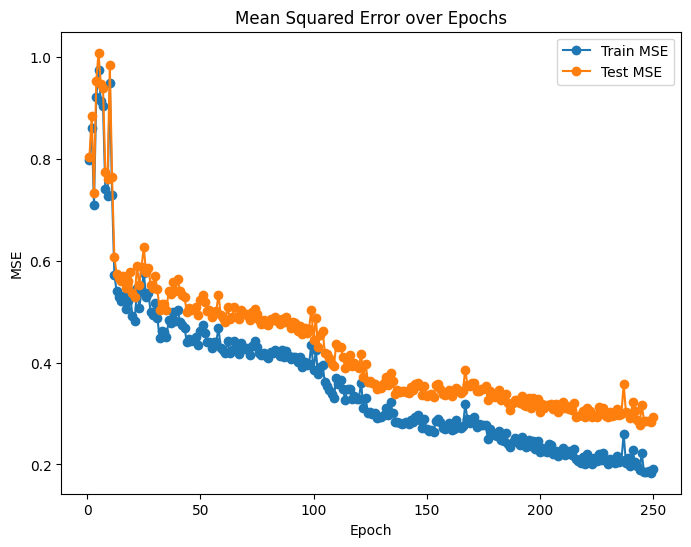

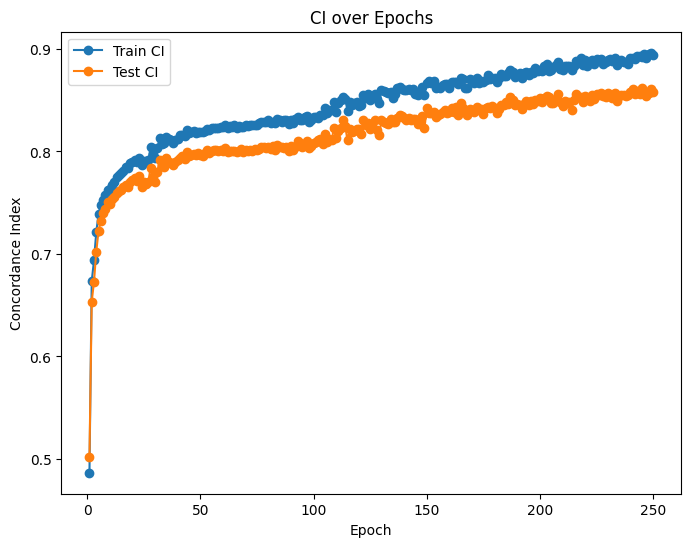

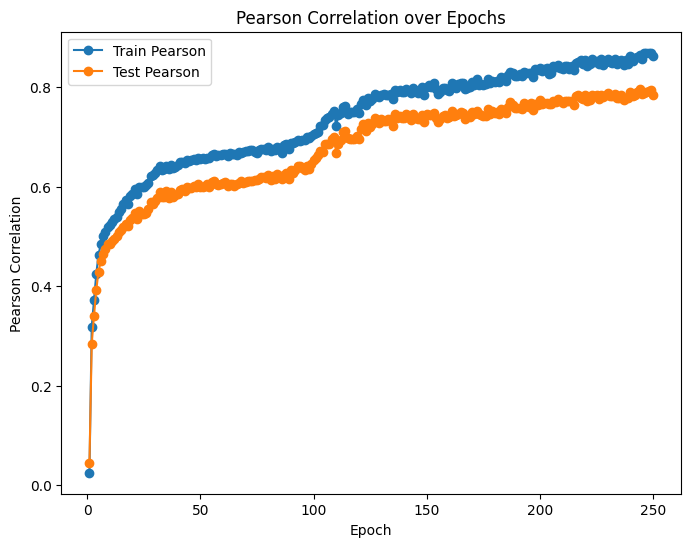

In [3]:
#model Add ! 
import os
import warnings
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import MSELoss
from torch_geometric.nn import GCNConv, global_mean_pool as gep
from torch_geometric.data import Data, Batch
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

# Optional, for plotting:
import matplotlib.pyplot as plt

##############################################################################
#                               1. METRICS
##############################################################################

@torch.no_grad()
def ci_vectorized(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    Naive O(N^2) Concordance Index using vectorized GPU operations.
    preds, targets: (N,) on the same device (e.g. cuda).
    """
    # (N, N) differences
    p_diff = preds.unsqueeze(1) - preds.unsqueeze(0)
    t_diff = targets.unsqueeze(1) - targets.unsqueeze(0)
    # mask out pairs where targets are identical
    mask = (t_diff != 0)
    # sign of product => +1 (concordant), 0 (tie), -1 (discordant)
    sign_mat = torch.sign(p_diff * t_diff)
    # step function h(x): 1 if x>0, 0.5 if x=0, 0 if x<0
    h = (sign_mat == 1).float() + 0.5 * (sign_mat == 0).float()
    # apply mask
    h_masked = h * mask.float()
    c = h_masked.sum()
    s = mask.sum().float()
    return (c / s).item() if s > 0 else 0.0

@torch.no_grad()
def mse_torch(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    GPU-friendly MSE using torch's built-in mean squared error.
    """
    return F.mse_loss(preds, targets, reduction='mean').item()

@torch.no_grad()
def pearson_torch(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    Pearson correlation coefficient in PyTorch (GPU-friendly).
    preds, targets: (N,) on the same device
    """
    p_centered = preds - preds.mean()
    t_centered = targets - targets.mean()
    cov = (p_centered * t_centered).sum()
    denom = torch.sqrt((p_centered**2).sum()) * torch.sqrt((t_centered**2).sum())
    eps = 1e-8
    return (cov / (denom + eps)).item()

##############################################################################
#                       2. GNN MODEL DEFINITION
##############################################################################

class GNNNet(torch.nn.Module):
    def __init__(self, n_output=1, num_features_pro=54, num_features_mol=78, output_dim=128, dropout=0.2):
        super(GNNNet, self).__init__()

        print('GNNNet Loaded')
        self.n_output = n_output
        self.mol_conv1 = GCNConv(num_features_mol, num_features_mol)
        self.mol_conv2 = GCNConv(num_features_mol, num_features_mol * 2)
        self.mol_conv3 = GCNConv(num_features_mol * 2, num_features_mol * 4)
        self.mol_fc_g1 = torch.nn.Linear(num_features_mol * 4, 1024)
        self.mol_fc_g2 = torch.nn.Linear(1024, output_dim)

        # self.pro_conv1 = GCNConv(embed_dim, embed_dim)
        self.pro_conv1 = GCNConv(num_features_pro, num_features_pro)
        self.pro_conv2 = GCNConv(num_features_pro, num_features_pro * 2)
        self.pro_conv3 = GCNConv(num_features_pro * 2, num_features_pro * 4)
        # self.pro_conv4 = GCNConv(embed_dim * 4, embed_dim * 8)
        self.pro_fc_g1 = torch.nn.Linear(num_features_pro * 4, 1024)
        self.pro_fc_g2 = torch.nn.Linear(1024, output_dim)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

        # combined layers
        self.fc1 = nn.Linear(output_dim, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.out = nn.Linear(512, self.n_output)

    def forward(self, data_mol, data_pro):
        # get graph input
        mol_x, mol_edge_index, mol_batch = data_mol.x, data_mol.edge_index, data_mol.batch
        # get protein input
        target_x, target_edge_index, target_batch = data_pro.x, data_pro.edge_index, data_pro.batch

        # target_seq=data_pro.target

        # print('size')
        # print('mol_x', mol_x.size(), 'edge_index', mol_edge_index.size(), 'batch', mol_batch.size())
        # print('target_x', target_x.size(), 'target_edge_index', target_batch.size(), 'batch', target_batch.size())

        x = self.mol_conv1(mol_x, mol_edge_index)
        x = self.relu(x)

        # mol_edge_index, _ = dropout_adj(mol_edge_index, training=self.training)
        x = self.mol_conv2(x, mol_edge_index)
        x = self.relu(x)

        # mol_edge_index, _ = dropout_adj(mol_edge_index, training=self.training)
        x = self.mol_conv3(x, mol_edge_index)
        x = self.relu(x)
        x = gep(x, mol_batch)  # global pooling

        # flatten
        x = self.relu(self.mol_fc_g1(x))
        x = self.dropout(x)
        x = self.mol_fc_g2(x)
        x = self.dropout(x)

        xt = self.pro_conv1(target_x, target_edge_index)
        xt = self.relu(xt)

        # target_edge_index, _ = dropout_adj(target_edge_index, training=self.training)
        xt = self.pro_conv2(xt, target_edge_index)
        xt = self.relu(xt)

        # target_edge_index, _ = dropout_adj(target_edge_index, training=self.training)
        xt = self.pro_conv3(xt, target_edge_index)
        xt = self.relu(xt)

        # xt = self.pro_conv4(xt, target_edge_index)
        # xt = self.relu(xt)
        xt = gep(xt, target_batch)  # global pooling

        # flatten
        xt = self.relu(self.pro_fc_g1(xt))
        xt = self.dropout(xt)
        xt = self.pro_fc_g2(xt)
        xt = self.dropout(xt)

        # print("sizes of out coming gnns",x.size(), xt.size())

        # print("Before combining:")
        # print(f"x stats -> min: {x.min().item()}, max: {x.max().item()}, mean: {x.mean().item()}")
        # print(f"xt stats -> min: {xt.min().item()}, max: {xt.max().item()}, mean: {xt.mean().item()}")
        
        # # Try different ways of combining x and xt
        # xc_concat = torch.cat((x, xt), 1)  # Concatenation
        # xc_mult = x * xt  # Element-wise multiplication
        # xc_add = x + xt  # Addition (only if ranges are similar)
        
        # print("After combining:")
        # print(f"xc_concat shape: {xc_concat.shape}")
        # print(f"xc_mult stats -> min: {xc_mult.min().item()}, max: {xc_mult.max().item()}, mean: {xc_mult.mean().item()}")
        # print(f"xc_add stats -> min: {xc_add.min().item()}, max: {xc_add.max().item()}, mean: {xc_add.mean().item()}")

        #adding insted of concat !
        xc = x + xt
        # concat
        # xc = torch.cat((x, xt), 1)
        # print('after concat',xc.size())
        # add some dense layers
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        return out

##############################################################################
#                   3. DATA LOADING HELPERS
##############################################################################

warnings.filterwarnings('ignore', category=FutureWarning)

def load_sample(path):
    """
    Load a .pt sample, fix up 'x' and 'edge_index', return (mol_data, pro_data, target).
    """
    sample = torch.load(path)
    mol_data, pro_data, target = sample[0], sample[1], sample[2]

    # Convert dict to Data if needed
    if isinstance(mol_data, dict):
        mol_data = Data(**mol_data)
    if isinstance(pro_data, dict):
        pro_data = Data(**pro_data)

    # Fix x
    if not hasattr(mol_data, 'x') or mol_data.x is None:
        if hasattr(mol_data, 'features'):
            mol_data.x = mol_data.features
            del mol_data.features
        else:
            raise ValueError("mol_data missing 'x' or 'features'")
    if not hasattr(pro_data, 'x') or pro_data.x is None:
        if hasattr(pro_data, 'features'):
            pro_data.x = pro_data.features
            del pro_data.features
        else:
            raise ValueError("pro_data missing 'x' or 'features'")

    mol_data.x = torch.as_tensor(mol_data.x, dtype=torch.float32)
    pro_data.x = torch.as_tensor(pro_data.x, dtype=torch.float32)

    # Fix edge_index
    def fix_edge_index(d):
        if not isinstance(d.edge_index, torch.Tensor):
            d.edge_index = torch.tensor(d.edge_index, dtype=torch.long)
        else:
            d.edge_index = d.edge_index.long()
        if d.edge_index.shape[0] != 2:
            d.edge_index = d.edge_index.t()
        d.num_nodes = d.x.size(0)

    fix_edge_index(mol_data)
    fix_edge_index(pro_data)

    return (mol_data, pro_data, target)

def batch_loader(file_list, sample_dir, batch_size):
    """
    Yields batches of (mol_data, pro_data, target) from file_list.
    """
    batch = []
    for file_name in file_list:
        path = os.path.join(sample_dir, file_name)
        sample = load_sample(path)
        batch.append(sample)
        if len(batch) == batch_size:
            yield batch
            batch = []
    if batch:
        yield batch

##############################################################################
#              4. TRAINING / EVALUATION WITH METRICS EACH EPOCH
##############################################################################

import os
import torch

def train_and_evaluate(sample_dir, num_epochs=10, test_size=0.2, lr=0.001):
    """
    Trains the GNN model, evaluates on train & test each epoch, saves metrics + checkpoints.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Running on {device}.")

    # Gather samples
    sample_files = [f for f in os.listdir(sample_dir) if f.endswith('.pt')]
    assert len(sample_files) > 0, "No .pt files found in sample_dir!"

    # Split
    train_files, test_files = train_test_split(sample_files, test_size=test_size, random_state=42)

    # Make checkpoint dir
    training_model_dir = os.path.join(os.getcwd(), 'TrainingModelADD')
    os.makedirs(training_model_dir, exist_ok=True)
    print(f"Checkpoints will be saved to: {training_model_dir}")

    metrics_path = os.path.join(training_model_dir, "training_metrics.pt")

    # Load existing metrics if available (Ensures metrics continue from previous runs)
    if os.path.exists(metrics_path):
        saved_metrics = torch.load(metrics_path)
        train_metrics = saved_metrics['train_metrics']
        test_metrics = saved_metrics['test_metrics']
        print("Loaded previous training metrics!")
    else:
        train_metrics = {'epoch': [], 'mse': [], 'ci': [], 'pearson': []}
        test_metrics = {'epoch': [], 'mse': [], 'ci': [], 'pearson': []}
        print("Starting fresh metrics tracking.")

    # Infer input dims from one sample
    sample0 = load_sample(os.path.join(sample_dir, train_files[0]))
    mol_data0, pro_data0 = sample0[0], sample0[1]
    num_features_mol = mol_data0.x.size(1)
    num_features_pro = pro_data0.x.size(1)

    # Initialize model
    model = GNNNet(num_features_mol=num_features_mol,
                   num_features_pro=num_features_pro).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = MSELoss()

    # Possibly resume from checkpoint
    start_epoch = 1
    existing_checkpoints = [
        f for f in os.listdir(training_model_dir)
        if f.endswith('.pt') and f.startswith('model_epoch')
    ]
    last_ckpt_path = None  # Track previous checkpoint for deletion

    if existing_checkpoints:
        latest_ckpt = max(existing_checkpoints, key=lambda x: int(x.split('_epoch')[1].split('.pt')[0]))
        ckpt_path = os.path.join(training_model_dir, latest_ckpt)
        print(f"Loading checkpoint from {ckpt_path}")
        ckpt = torch.load(ckpt_path, map_location=device)
        model.load_state_dict(ckpt['model_state_dict'])
        optimizer.load_state_dict(ckpt['optimizer_state_dict'])
        loaded_epoch = ckpt['epoch']
        start_epoch = loaded_epoch + 1
        last_ckpt_path = ckpt_path  # Store last checkpoint path for deletion
        print(f"Resuming from epoch {start_epoch}")
    else:
        print("No existing checkpoint found; starting fresh.")

    @torch.no_grad()
    def evaluate(files):
        model.eval()
        all_preds = []
        all_targets = []
        batch_eval_size = 200
        for batch_samples in batch_loader(files, sample_dir, batch_eval_size):
            mol_list, pro_list, tgt_list = [], [], []
            for (md, pd, t) in batch_samples:
                mol_list.append(md)
                pro_list.append(pd)
                tgt_list.append(t)

            mol_batch = Batch.from_data_list(mol_list).to(device)
            pro_batch = Batch.from_data_list(pro_list).to(device)
            t_tensor = torch.tensor(tgt_list, dtype=torch.float32, device=device)

            out = model(mol_batch, pro_batch).view(-1)
            all_preds.append(out)
            all_targets.append(t_tensor)

        all_preds = torch.cat(all_preds, dim=0)
        all_targets = torch.cat(all_targets, dim=0)

        mse_val = mse_torch(all_preds, all_targets)
        ci_val = ci_vectorized(all_preds, all_targets)
        pearson_val = pearson_torch(all_preds, all_targets)
        return mse_val, ci_val, pearson_val

    # Training loop
    batch_size = 200
    for epoch in tqdm(range(start_epoch, num_epochs + 1), desc="Training", unit="epoch"):
        model.train()
        running_loss = 0.0

        for batch_samples in batch_loader(train_files, sample_dir, batch_size):
            mol_list, pro_list, tgt_list = [], [], []
            for (md, pd, t) in batch_samples:
                mol_list.append(md)
                pro_list.append(pd)
                tgt_list.append(t)

            mol_batch = Batch.from_data_list(mol_list).to(device)
            pro_batch = Batch.from_data_list(pro_list).to(device)
            t_tensor = torch.tensor(tgt_list, dtype=torch.float32, device=device).view(-1)

            optimizer.zero_grad()
            out = model(mol_batch, pro_batch).view(-1)
            loss = loss_fn(out, t_tensor)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * len(batch_samples)

        avg_loss = running_loss / len(train_files)
        tqdm.write(f"[Epoch {epoch}/{num_epochs}] Training Loss: {avg_loss:.4f}")

        # Evaluate on train & test
        train_mse, train_ci, train_pearson = evaluate(train_files)
        test_mse, test_ci, test_pearson = evaluate(test_files)

        train_metrics['epoch'].append(epoch)
        train_metrics['mse'].append(train_mse)
        train_metrics['ci'].append(train_ci)
        train_metrics['pearson'].append(train_pearson)

        test_metrics['epoch'].append(epoch)
        test_metrics['mse'].append(test_mse)
        test_metrics['ci'].append(test_ci)
        test_metrics['pearson'].append(test_pearson)

        tqdm.write(f"  Train => MSE={train_mse:.4f}, CI={train_ci:.4f}, Pearson={train_pearson:.4f}")
        tqdm.write(f"  Test  => MSE={test_mse:.4f}, CI={test_ci:.4f}, Pearson={test_pearson:.4f}")

        # Save new checkpoint
        ckpt_name = f"model_epoch{epoch}.pt"
        ckpt_path = os.path.join(training_model_dir, ckpt_name)
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
        }, ckpt_path)
        tqdm.write(f"Checkpoint saved at epoch {epoch}")

        # Delete the previous checkpoint after saving the new one
        if last_ckpt_path and os.path.exists(last_ckpt_path):
            os.remove(last_ckpt_path)
            tqdm.write(f"Deleted previous checkpoint: {last_ckpt_path}")

        # Update last checkpoint path
        last_ckpt_path = ckpt_path

        # Save/Update the metrics after each epoch
        torch.save({
            'train_metrics': train_metrics,
            'test_metrics': test_metrics
        }, metrics_path)

    # Final evaluations
    final_train_mse, final_train_ci, final_train_pearson = evaluate(train_files)
    final_test_mse, final_test_ci, final_test_pearson = evaluate(test_files)
    print(f"\nFinal Train => MSE={final_train_mse:.4f}, CI={final_train_ci:.4f}, Pearson={final_train_pearson:.4f}")
    print(f"Final Test  => MSE={final_test_mse:.4f}, CI={final_test_ci:.4f}, Pearson={final_test_pearson:.4f}")

    # Save final metrics
    torch.save({
        'train_metrics': train_metrics,
        'test_metrics': test_metrics
    }, metrics_path)
    print(f"Metrics saved to {metrics_path}")

    return train_metrics, test_metrics


##############################################################################
#               5. OPTIONAL: PLOT THE SAVED METRICS
##############################################################################

def plot_metrics(checkpoint_dir='TrainingModelADD'):
    """
    Load training_metrics.pt from the checkpoint_dir and plot MSE, CI, Pearson over epochs.
    """
    metrics_path = os.path.join(checkpoint_dir, "training_metrics.pt")
    if not os.path.exists(metrics_path):
        print(f"No metrics file found at {metrics_path}!")
        return

    saved_data = torch.load(metrics_path)
    train_metrics = saved_data['train_metrics']
    test_metrics = saved_data['test_metrics']
    epochs = train_metrics['epoch']

    # Plot MSE
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['mse'], 'o-', label='Train MSE')
    plt.plot(epochs, test_metrics['mse'], 'o-', label='Test MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('Mean Squared Error over Epochs')
    plt.legend()
    plt.savefig(os.path.join(checkpoint_dir, "MSE_plot.png"))  
    plt.show()

    # Plot CI
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['ci'], 'o-', label='Train CI')
    plt.plot(epochs, test_metrics['ci'], 'o-', label='Test CI')
    plt.xlabel('Epoch')
    plt.ylabel('Concordance Index')
    plt.title('CI over Epochs')
    plt.savefig(os.path.join(checkpoint_dir, "CI_plot.png"))  
    plt.legend()
    plt.show()

    # Plot Pearson
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['pearson'], 'o-', label='Train Pearson')
    plt.plot(epochs, test_metrics['pearson'], 'o-', label='Test Pearson')
    plt.xlabel('Epoch')
    plt.ylabel('Pearson Correlation')
    plt.title('Pearson Correlation over Epochs')
    plt.legend()
    plt.savefig(os.path.join(checkpoint_dir, "PEARSON_plot.png"))  
    plt.show()

##############################################################################
#                                 MAIN
##############################################################################

if __name__ == "__main__":
    # Adjust the paths/parameters as needed
    SAMPLE_DIR = "prepared_samples"   # Directory with your .pt samples
    NUM_EPOCHS = 250
    TEST_SPLIT = 0.2
    LR = 0.001

    # 1) Train and evaluate
    train_metrics, test_metrics = train_and_evaluate(
        sample_dir=SAMPLE_DIR,
        num_epochs=NUM_EPOCHS,
        test_size=TEST_SPLIT,
        lr=LR
    )

    # 2) Plot the metrics
    plot_metrics('TrainingModelADD')

